In [4]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import scipy.stats as stats
import pingouin as pg

# Импортируем нужные библиотеки

In [5]:
sales_url = r"C:\Users\fomin\GitHub_projects\Analytics\Zara_sales\zara_sales.csv"
sales = pd.read_csv(sales_url, sep = ';')

sales.head()

# Подгружаем файл с данными и записываем его в датафрейм sales

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


In [6]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

# Устанавливаем настройки для графиков, которые будем использовать

In [7]:
sales.columns = sales.columns.str.lower().str.replace(' ', '_')

# Приводим к удобному для работы виду названия колонок 

In [8]:
sales['revenue_by_item'] = sales.sales_volume * sales.price

# Вводим новый столбец, который описывает выручку с айтема - перемножив количество проданного товара на его цену

In [9]:
sales.duplicated().sum()

# Проверка на дубликаты

0

In [10]:
sales.isnull().sum()

# Проверка на нулевые значения

product_id          0
product_position    0
promotion           0
product_category    0
seasonal            0
sales_volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
revenue_by_item     0
dtype: int64

In [11]:
is_null_df = sales.isnull()
row_with_null = is_null_df.any(axis=1)
rows_with_null = sales[row_with_null]
rows_with_null

# Поиск строк, где есть хотя бы одно нулевое значение
# Можно дропнуть эти строки из датафрейма, учтя выручку с товаров в них

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section,revenue_by_item
60,151925,End-cap,Yes,Clothing,Yes,2179,Zara,https://www.zara.com/us/en/vintage-effect-leat...,320774184-800-97,VINTAGE EFFECT LEATHER BOMBER JACKET,NaN,299.0,USD,2024-02-19T08:50:43.543555,jackets,MAN,651521.0
72,173576,End-cap,Yes,Clothing,No,1838,Zara,https://www.zara.com/us/en/-p04310461.html,336378923-700-2,NaN,NaN,129.0,USD,2024-02-19T08:50:54.476057,jackets,MAN,237102.0


In [12]:
np.round(100 - (sales.revenue_by_item.sum() - rows_with_null.revenue_by_item.sum())/sales.revenue_by_item.sum()*100, 2)

# Считаем % выручки, который уйдет при дропе строчек с нулями

2.28

In [13]:
sales = sales.dropna()

# Дропаем нулевые значения

In [14]:
sales.product_category.unique()

# Категория товаров лишь одна, ее нет смысла анализировать

array(['Clothing'], dtype=object)

In [15]:
# Рассмотрим данные в отношении выручки с товаров

In [16]:
sales.groupby('name').filter(lambda x: len(x) > 1).name.nunique()

# Получается 40 уникальных названий товара, name, повторяются в датафрейме sales

40

In [17]:
nunique_name = sales.groupby(['name'], as_index=False).agg({'revenue_by_item':'count'}).sort_values('revenue_by_item') \
    .rename(columns={'revenue_by_item':'counts_in_df'})

nunique_name.loc[nunique_name.counts_in_df > 1].head()

# Датафрейм уникальных значений name, которые повторяются 2 или более раз

,name,counts_in_df
162,SUIT JACKET,2
185,WOOL BLEND JACKET,2
160,SUEDE SNEAKERS,2
167,TECHNICAL PADDED JACKET,2
0,100% FEATHER FILL PUFFER JACKET,2


In [18]:
repeated_names_df = sales[sales.groupby('name')['name'].transform('size') > 1].sort_values('name')

repeated_names_df.head()

# Датафрейм товаров, где значение name встречается в датафпрейме sales более одного раза

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section,revenue_by_item
9,137121,Aisle,No,Clothing,Yes,656,Zara,https://www.zara.com/us/en/100-feather-fill-pu...,312372602-800-2,100% FEATHER FILL PUFFER JACKET,Puffer jacket made of shiny finish technical f...,169.0,USD,2024-02-19T08:50:11.380061,jackets,MAN,110864.0
97,120228,End-cap,No,Clothing,No,2347,Zara,https://www.zara.com/us/en/100-feather-fill-pu...,327116625-505-2,100% FEATHER FILL PUFFER JACKET,Puffer vest made of technical fabric. Fill is ...,89.9,USD,2024-02-19T08:51:09.075286,jackets,MAN,210995.3
200,141547,End-cap,No,Clothing,No,1426,Zara,https://www.zara.com/us/en/baggy-fit-jeans-p06...,315738965-802-34,BAGGY FIT JEANS,Baggy fit jeans. Five pockets. Washed effect. ...,69.9,USD,2024-02-19T08:54:39.496146,jeans,MAN,99677.4
199,198283,End-cap,Yes,Clothing,Yes,1558,Zara,https://www.zara.com/us/en/baggy-fit-jeans-p08...,315836999-406-34,BAGGY FIT JEANS,Baggy fit jeans. Five pockets. Washed effect. ...,69.9,USD,2024-02-19T08:54:39.017964,jeans,MAN,108904.2
92,146839,Aisle,No,Clothing,No,1525,Zara,https://www.zara.com/us/en/bomber-jacket-p0534...,321496813-710-2,BOMBER JACKET,Jacket with padded interior. Rib elastic colla...,109.0,USD,2024-02-19T08:51:06.241653,jackets,MAN,166225.0


In [19]:
a = []
for i in repeated_names_df.name.unique():
    if repeated_names_df.groupby(['name', 'terms']).revenue_by_item.sum().loc[i].size > 1:
        a.append(i)        

# Находим названия товаров name, которые в датафрейме sales встречаются с разной маркировкой в типе товара (параметр terms)
# и записываем их в лист. 

sales.query('name == @a').head()

# Сортируем датафрейм sales по тем наименованиям товаров, name, которые встречаются с разной маркировкой по параметру terms -
# тип товара

# Вопрос состоит в том, ошибка ли это или есть какие-то особенности, в реальной жизни имел бы смысл отправить запрос на
# разъяснение ситуации в соответствующую команду, т.к. товар, который имеет в названии "Jacket" тут может быть отнесен
# и к jackets, и к sweaters

,product_id,product_position,promotion,product_category,seasonal,sales_volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section,revenue_by_item
7,182157,Aisle,No,Clothing,No,2421,Zara,https://www.zara.com/us/en/suit-jacket-in-100-...,322972485-431-46,SUIT JACKET IN 100% LINEN,Straight fit blazer made of linen. Notched lap...,159.0,USD,2024-02-19T08:50:10.200777,jackets,MAN,384939.0
10,113143,Aisle,Yes,Clothing,Yes,2663,Zara,https://www.zara.com/us/en/herringbone-texture...,316207900-710-2,HERRINGBONE TEXTURED JACKET,Jacket made of wool blend fabric. Lapel collar...,129.0,USD,2024-02-19T08:50:12.011296,jackets,MAN,343527.0
11,140028,Aisle,Yes,Clothing,Yes,1260,Zara,https://www.zara.com/us/en/oversized-cropped-j...,329186122-800-2,OVERSIZED CROPPED JACKET LIMITED EDITION,Oversized cropped jacket. Notched lapel collar...,159.0,USD,2024-02-19T08:50:12.510507,jackets,MAN,200340.0
12,134693,Aisle,Yes,Clothing,No,2124,Zara,https://www.zara.com/us/en/leather-biker-jacke...,311297791-800-2,LEATHER BIKER JACKET,Jacket with lapel collar and snap button detai...,169.0,USD,2024-02-19T08:50:13.210501,jackets,MAN,358956.0
13,151396,Front of Store,Yes,Clothing,Yes,729,Zara,https://www.zara.com/us/en/cropped-leather-jac...,323134418-800-3,CROPPED LEATHER JACKET,Leather jacket. Cropped length. Lapel collar a...,439.0,USD,2024-02-19T08:50:13.771115,jackets,MAN,320031.0


In [20]:
# Построим топ-10 товаров по выручке, т.е. 10 уникальных наименований, продажа которых принесла наибольшую выручку

In [21]:
top10_rev = sales \
    .groupby('name', as_index=False) \
    .agg({'revenue_by_item':'sum'}) \
    .sort_values('revenue_by_item', ascending = False).head(10)

top10_rev
# Считаем выручку по названию товара, name, в списке продаж, находим топ-10 продаж

,name,revenue_by_item
39,CONTRASTING PATCHES BOMBER JACKET,889308.0
163,SUIT JACKET IN 100% LINEN,816675.0
57,FAUX LEATHER BOMBER JACKET,798852.6
118,PLAID OVERSHIRT,695369.0
136,RIB COLLAR JACKET,685883.0
141,SLIM FIT SUIT JACKET,675719.0
124,POCKET OVERSHIRT,666987.8
155,SUEDE JACKET,649140.0
24,BOUCLÉ TEXTURED JACKET,609950.0
123,POCKET JACKET,608503.0


Text(0.5, 1.0, 'Top-10 products number of purchases by price distribution')

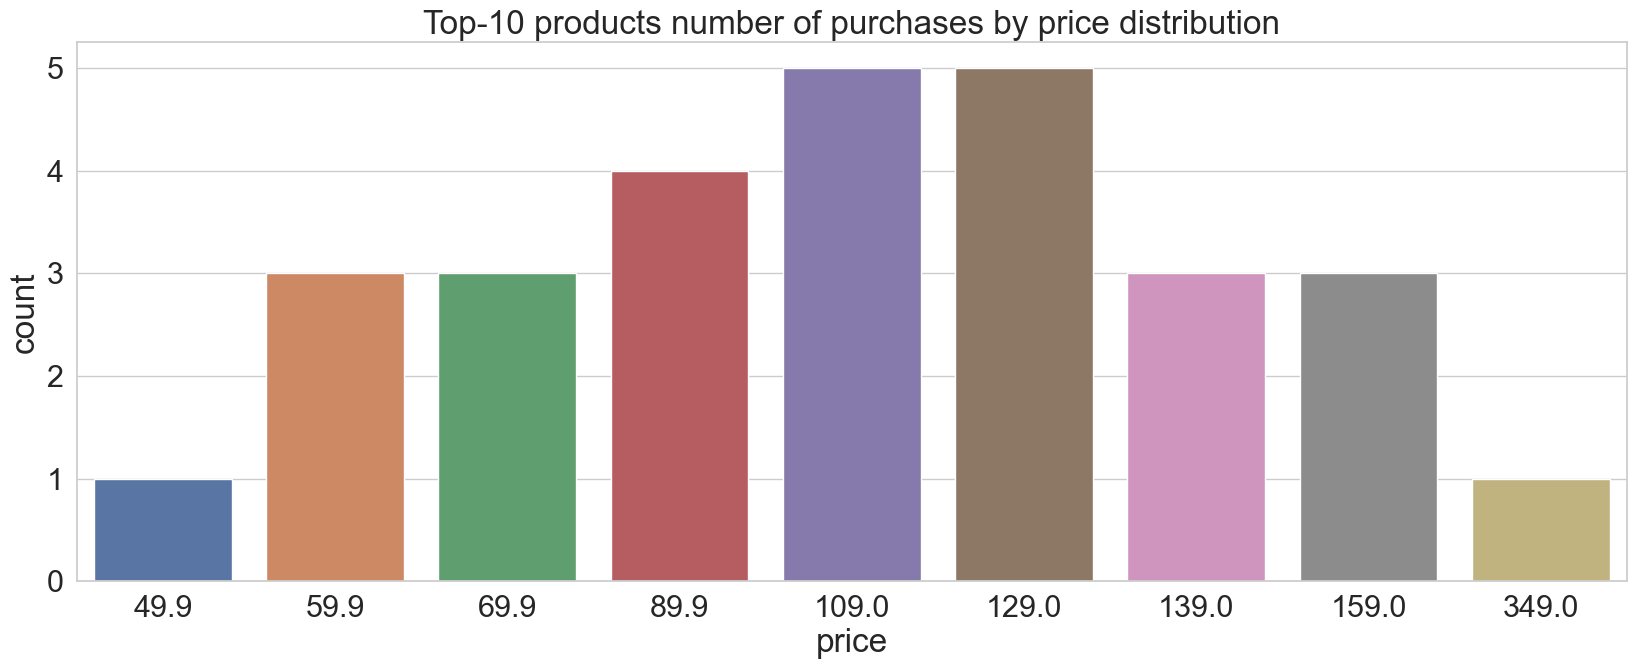

In [22]:
top10_items_rev_df = sales.query('name == @top10_rev.name.to_list()')

# Создаем датафрейм, в который входят только строки с наименованиями тех товаров, что в сумме приносят топ-10 выручки

ax0 = sns.countplot(top10_items_rev_df, x = 'price')
ax0.set_title('''Top-10 products number of purchases by price distribution''')

# Строим распределение цен по которым продаются товары (по name), приносящие в сумме топ-10 выручки среди всех товаров

Text(0.5, 1.0, "Top-10 products revenue by product's price")

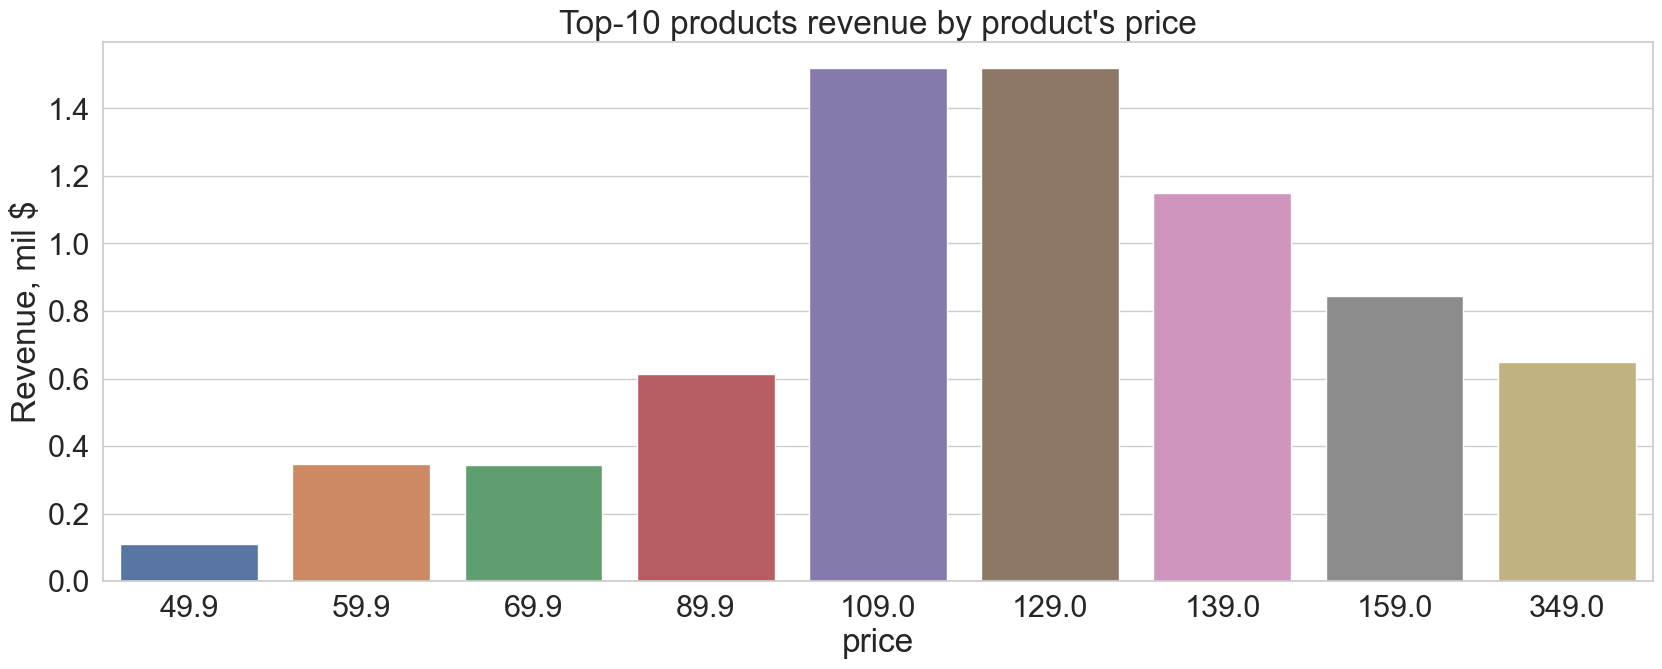

In [23]:
ax0_2 = sns.barplot(y=top10_items_rev_df \
                .groupby('price', as_index=False) \
                .revenue_by_item.sum() \
                .revenue_by_item \
                .rename('Revenue, mil $') / 1000000,
            x=top10_items_rev_df \
                .groupby('price', as_index=False) \
                .revenue_by_item.sum() \
                .price)
ax0_2.set_title('''Top-10 products revenue by product's price''')
# Распределение выручки в зависимости от цен товаров из топ-10 по принесенной выручке
# Больше всего денег приносят в топе товары со стоимость 109$ и 129$

Text(0.5, 1.0, "Top-10 products revenue by product's type and position")

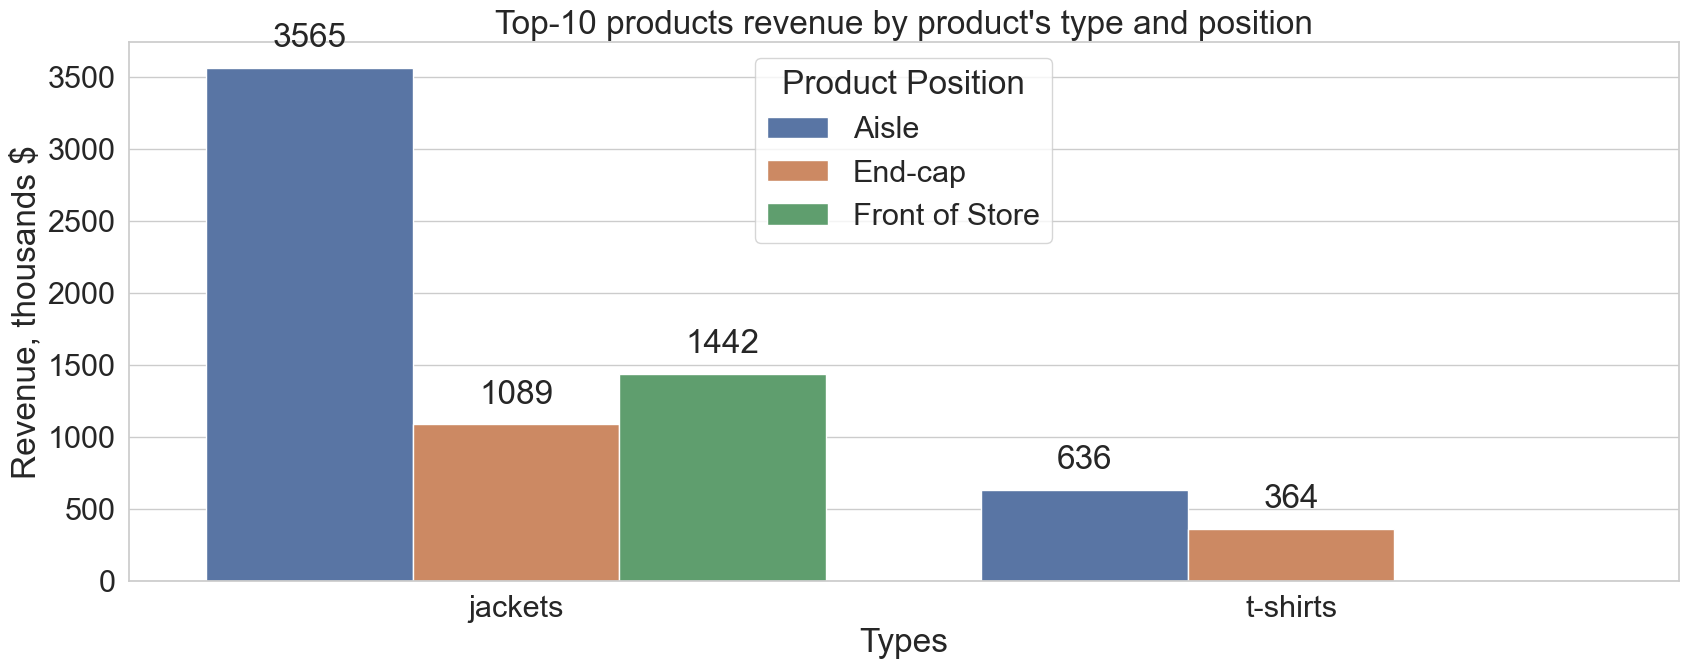

In [24]:
top10_items_terms_prodpos_rev = top10_items_rev_df.groupby(['terms', 'product_position'], as_index=False).revenue_by_item.sum()

# Строим датафрейм о выручке топ-10 продуктах в зависимости от параметров terms и product_position

ax0_3 = sns.barplot(x=top10_items_terms_prodpos_rev.terms.rename('Types'),
            y=top10_items_terms_prodpos_rev.revenue_by_item.rename('Revenue, thousands $') / 1000, 
            hue=top10_items_terms_prodpos_rev.product_position.rename('Product Position'))

for c in ax0_3.containers:
    ax0_3.bar_label(c, fmt='%.0f', padding=10)
    
ax0_3.set_title('''Top-10 products revenue by product's type and position''')

# Визуализировали выручку топ-10 продуктов в зависимости от их типа (type) и позиции в магазине (product_position)

In [25]:
# Изучим теперь распределение выручки по всем ценам исходного датафрейма sales

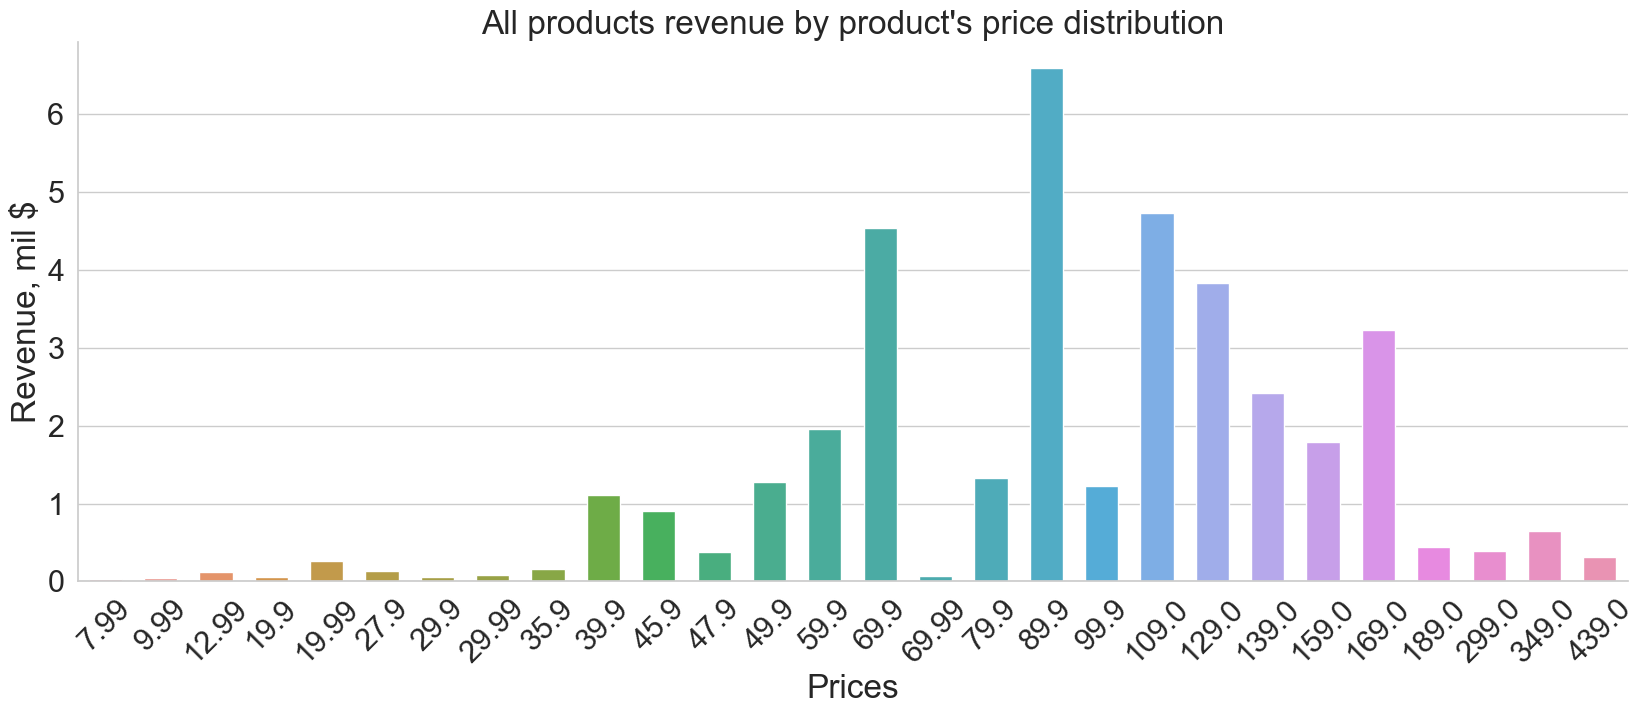

In [26]:
rev_by_price_df = sales \
    .groupby('price', as_index = False) \
    .revenue_by_item.sum()

# Создаем датафрейм выручки, полученной в зависимости от цены айтема


plt.pyplot.xticks(rotation=45)
ax0_4 = sns.barplot(x = rev_by_price_df.price, y = rev_by_price_df.revenue_by_item/1000000, width = 0.6)
ax0_4.set_title('''All products revenue by product's price distribution''')
ax0_4.set(ylabel='Revenue, mil $', xlabel='Prices')
sns.despine()

# Получаем распределение выручки в зависимости от цены вещи - смотрим, какие ценовые сегменты приносят более всего денег


# кластеризуй эти данные по ценам

In [27]:
# Теперь рассмотрим данные в разрезе мужского и женского отдела продаж

Text(0.5, 1.0, 'Number of purchases by gender section of the store')

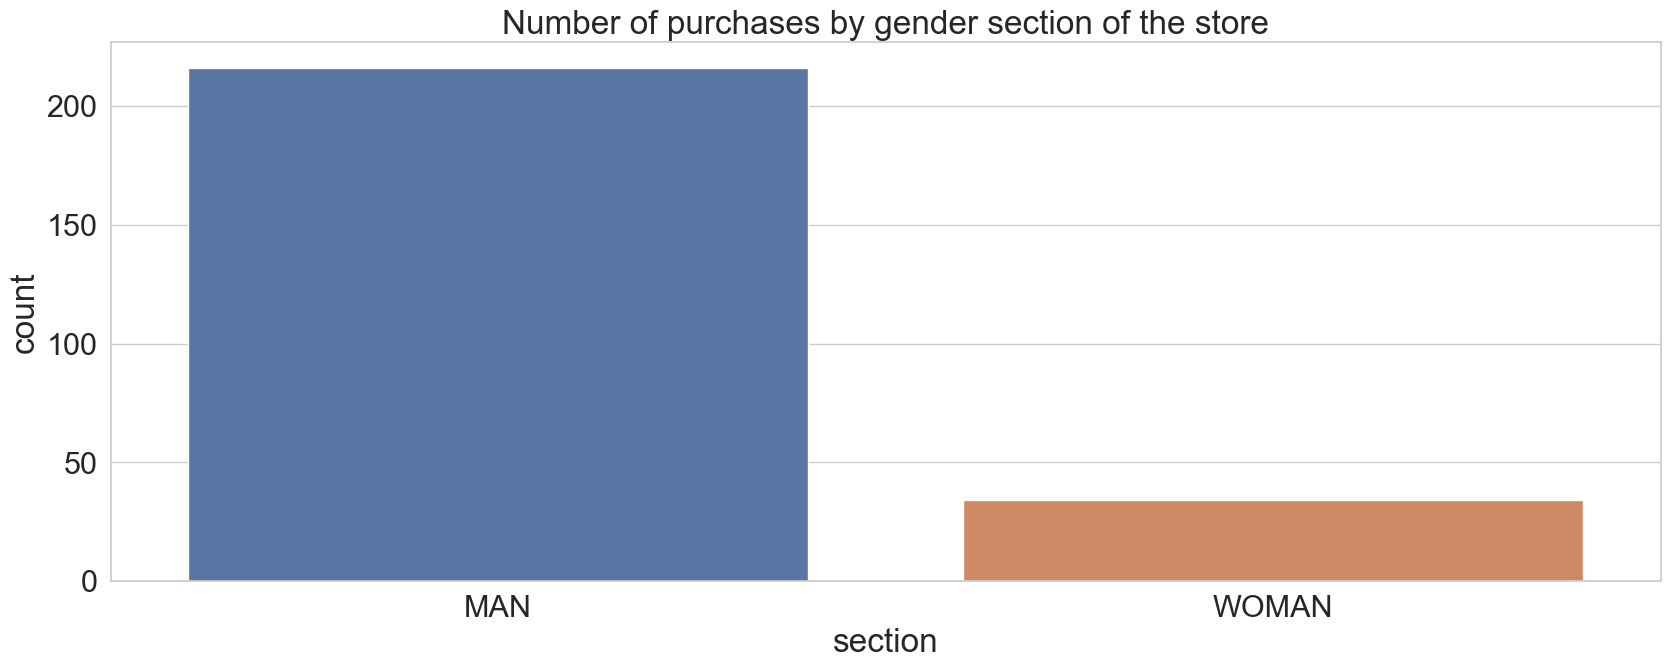

In [28]:
ax0_5 = sns.countplot(sales, x = "section")
ax0_5.set_title('''Number of purchases by gender section of the store''')

# Количество покупок в мужском и женском отделах

Text(0.5, 1.0, 'Revenue by gender section of the store')

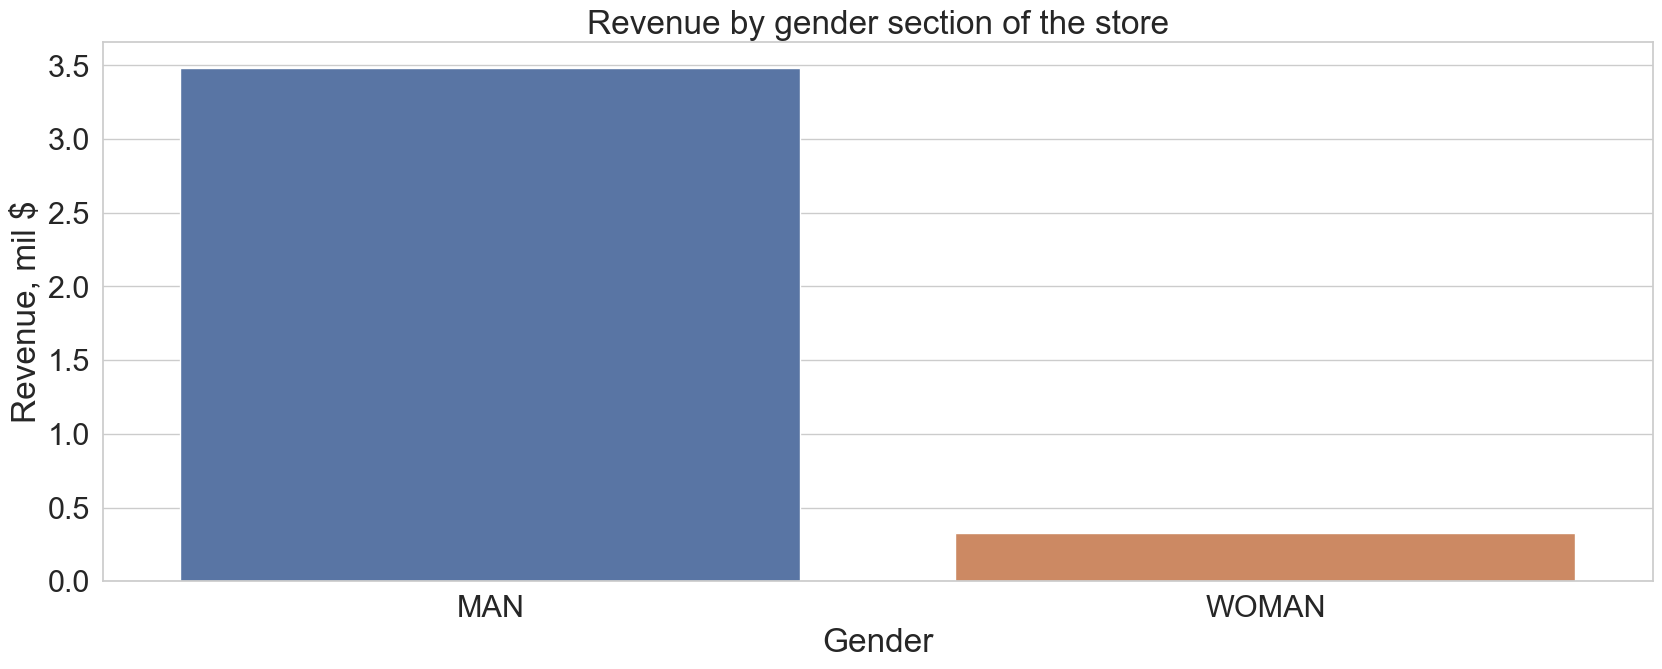

In [29]:
rev_by_gender_df = sales \
    .groupby('section', as_index=False) \
    .revenue_by_item.sum() \
    .rename(columns={'revenue_by_item':'revenue'})

rev_by_gender_df['revenue_share'] = np.round(rev_by_gender_df.revenue / rev_by_gender_df.revenue.sum() * 100,1)

# Создаем датафрейм с выручкой по гендерам rev_by_gender_df
# и отдельно столбец с долей выручки каждого отдела продаж (М и Ж) revenue_share

ax1 = sns.barplot(x=rev_by_gender_df.section, y=rev_by_gender_df.revenue /10000000)
ax1.set(xlabel='Gender', ylabel='Revenue, mil $')
ax1.set_title('''Revenue by gender section of the store''')

# Выручка, принесенная мужским и женским отделами

In [189]:
count_purch_by_gender_df = sales \
    .groupby('section', as_index=False) \
    .sales_volume.sum() \
    .rename(columns={'sales_volume':'number_of_purchases'})

count_purch_by_gender_df['num_of_purch_share'] = np.round(count_purch_by_gender_df.number_of_purchases /
                                                          count_purch_by_gender_df.number_of_purchases.sum() * 100,1)
# Создаем датафрейм с количеством покупок по гендерной секции count_purch_by_gender_df
# и отдельно столбец с долей количества покупок каждого отдела продаж (М и Ж) num_of_purch_share

gender_df = rev_by_gender_df.merge(count_purch_by_gender_df)
gender_df['mean_revenue_by_gend'] = np.round(gender_df.revenue /
                                             gender_df.number_of_purchases, 2)
gender_df['mean_rev_by_gen_share'] = np.round(gender_df.mean_revenue_by_gend /
                                              gender_df.mean_revenue_by_gend.sum() * 100, 2)

gender_df

# Создаем столбец mean_revenue_by_gend, в котором посчитали среднюю выручку с одной покупки для секций мужчин и женщин
# Также создали столбец mean_rev_by_gen_share, в котором посчитали долю секций в средней выручке

,section,revenue,revenue_share,number_of_purchases,num_of_purch_share,mean_revenue_by_gend,mean_rev_by_gen_share
0,MAN,34824040.03,91.4,392182,86.1,88.80,63.21
1,WOMAN,3275813.45,8.6,63374,13.9,51.69,36.79


In [31]:
# Все относительные показатели, такие, как доля выручки на гендерный отдел, revenue_share,
# доля количества покупок на гендерный отдел, num_of_purch_share,
# и доля в среднем чеке по гендерному отделу, mean_rev_by_gen_share,
# говорят о том, что основной целевой аудиторией магазина являются мужчины, 
# потому что их средняя покупка приносит намного больше денег, в среднем они намного чаще покупают, и их просто больше 

# На основе описанных тезисов можно сделать вывод, что в моменте мужская целевая аудитория сильно важнее для магазина, 
# чем женская

In [32]:
# Рассмотрим теперь данные по категории товаров - колонке terms

Text(0.5, 1.0, 'Revenue by product type')

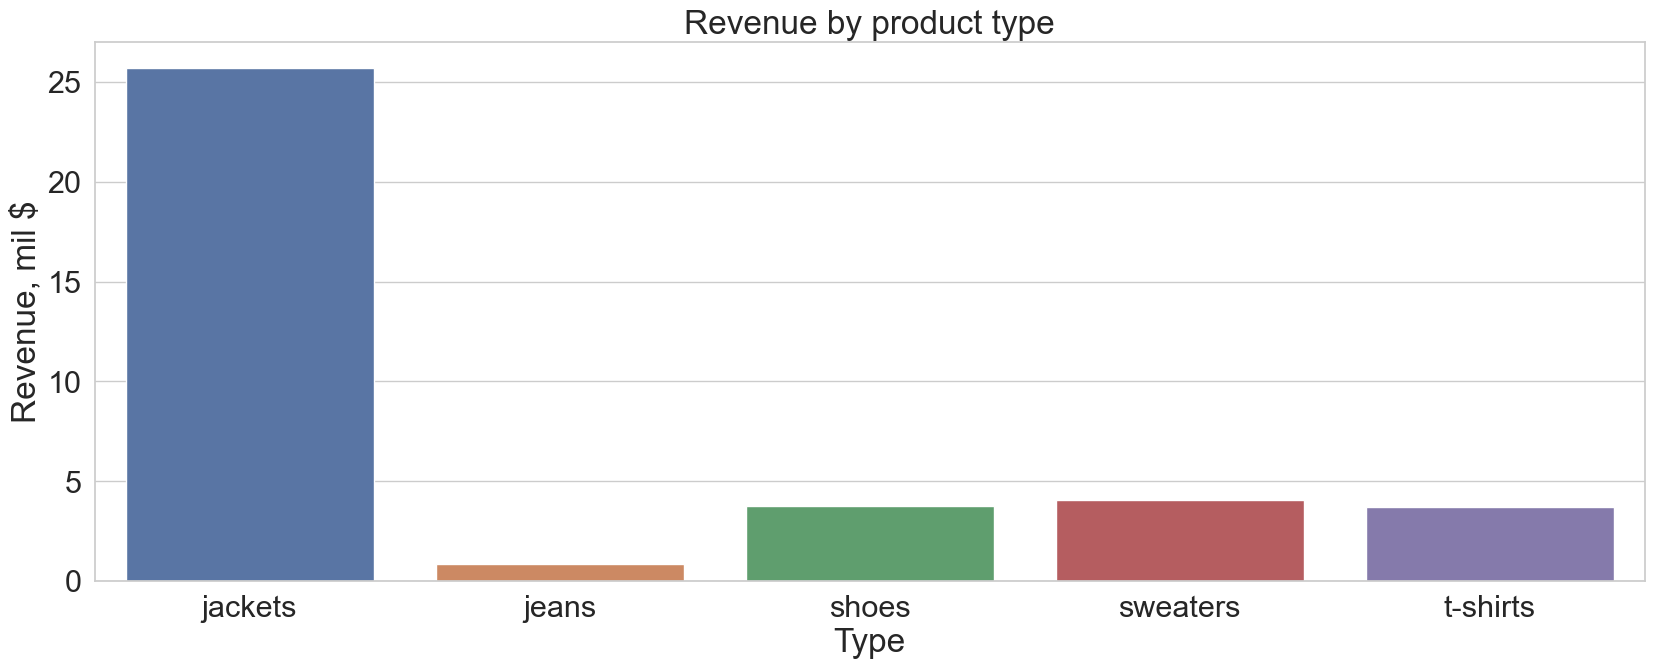

In [34]:
ax2_0 = sns.barplot(x = sales \
                      .groupby('terms', as_index=False) \
                      .revenue_by_item.sum() \
                      .terms,
                  y = sales \
                      .groupby('terms', as_index=False) \
                      .revenue_by_item.sum() \
                      .revenue_by_item / 1000000)

ax2_0.set(ylabel = 'Revenue, mil $', xlabel = 'Type')
ax2_0.set_title('''Revenue by product type''')

# Распределение выручки по типу товаров. Очевидный лидер - jackets. Попробуем разобраться почему это так

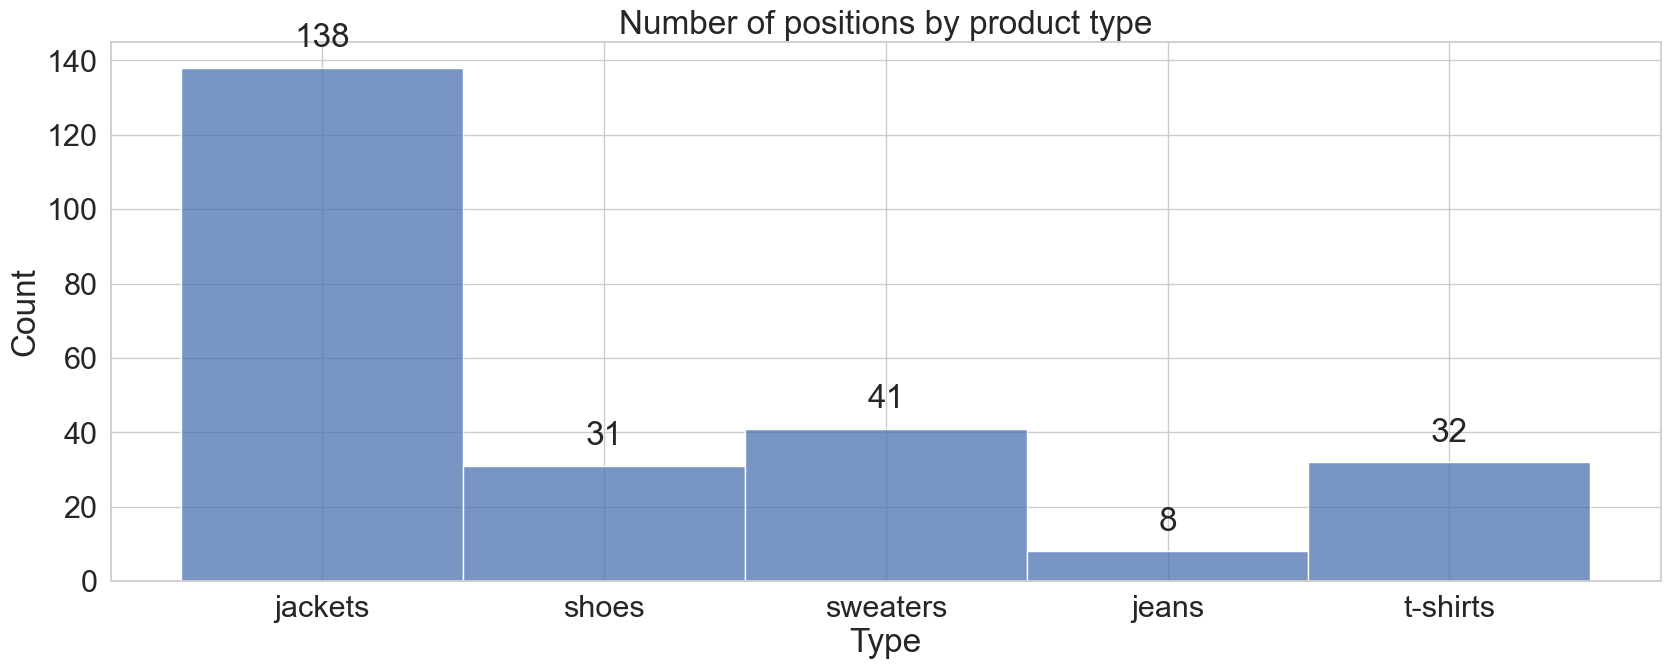

In [187]:
ax1_2 = sns.histplot(sales.terms.rename('Type'))
ax1_2.set_title('''Number of positions by product type''')

for container in ax1_2.containers:
    ax1_2.bar_label(container, padding=10)

# Построим распределение количества позиций в ассортименте по их типу

[Text(0.5, 0, 'Types'),
 Text(0, 0.5, 'Number of purchases'),
 Text(0.5, 1.0, 'Number of product purchases by product type')]

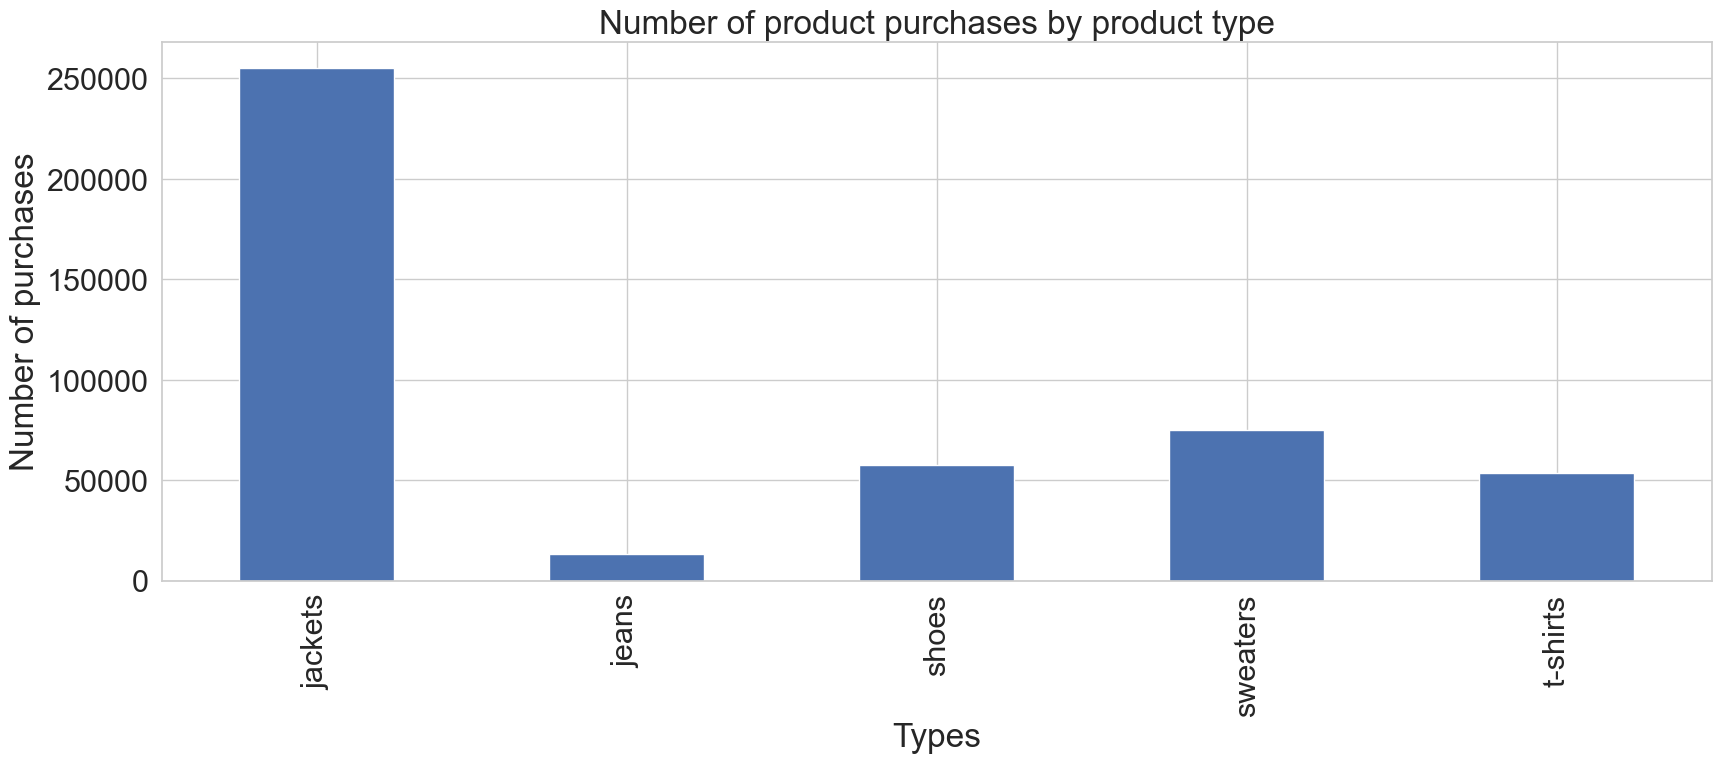

In [169]:
ax1_3 = sales \
    .groupby('terms') \
    .sales_volume.sum() \
    .plot.bar()

ax1_3.set(xlabel = 'Types',
          ylabel = 'Number of purchases',
          title = 'Number of product purchases by product type')

# График зависимости количества проданных товаров (sales_volume) от их типа (terms)

[Text(0.5, 0, 'Types'),
 Text(0, 0.5, 'Revenue, $'),
 Text(0.5, 1.0, 'Product mean revenue dependency on product type')]

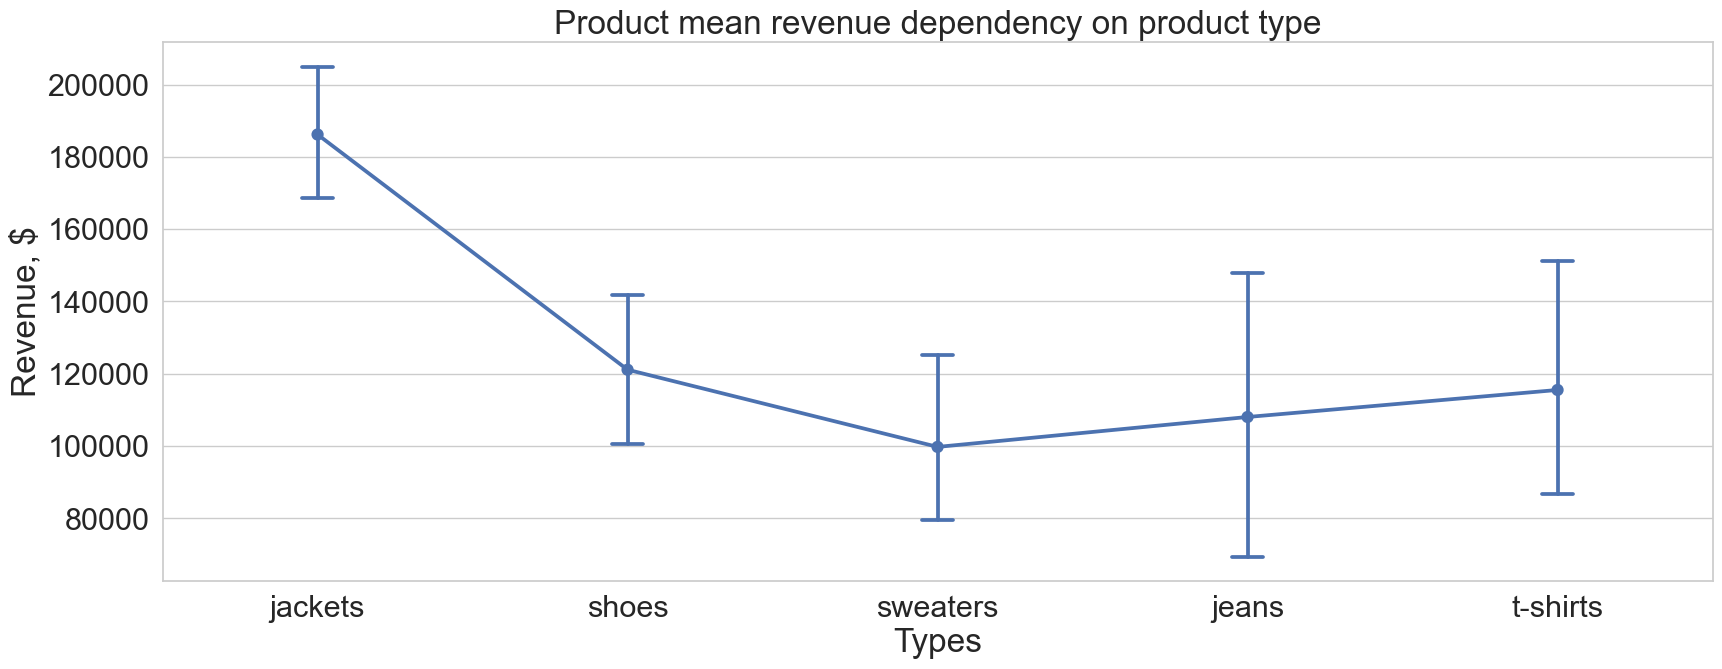

In [207]:
ax2_2 = sns.pointplot(x='terms', y='revenue_by_item', data=sales, capsize=0.1, errorbar='ci')
ax2_2.set(xlabel = 'Types', ylabel='Revenue, $', title='Product mean revenue dependency on product type')

# Находим среднюю выручку с каждого типа товара и строим 95% доверительный интервал
# Средняя выручка с jackets значительно выше, чем у других типов товара

Text(0.5, 1.0, "Sales volume by product's type boxplot distribution")

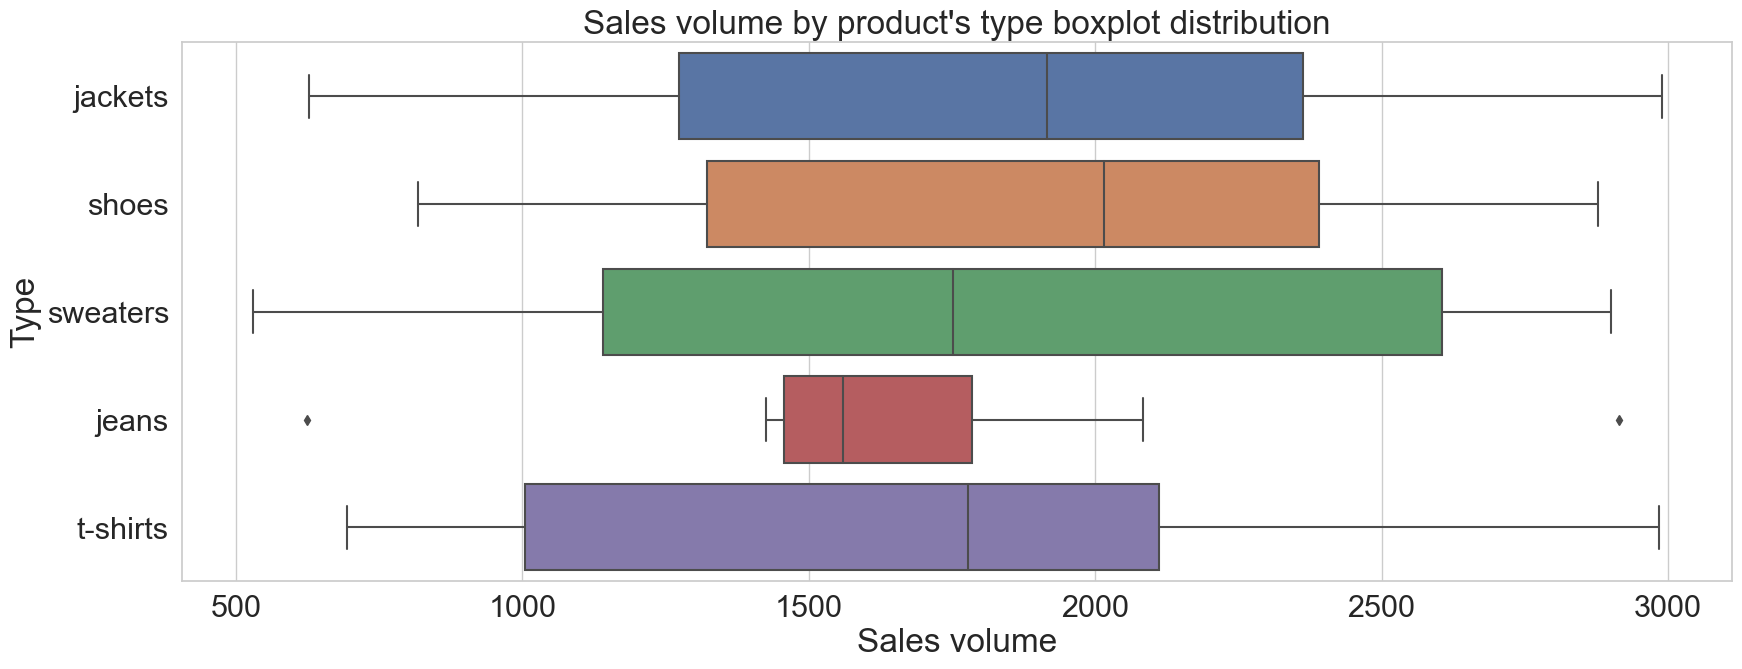

In [37]:
ax2_3 = sns.boxplot(data = sales, x='sales_volume', y = 'terms')

ax2_3.set(xlabel = 'Sales volume', ylabel = 'Type')
ax2_3.set_title('''Sales volume by product's type boxplot distribution''')

# Здесь приведен боксплот количества проданного товара в зависимости от его типа
# Видно, что люди покупают примерно одинаково все типы, кроме jeans - вероятно людям одинаково нравятся все представленные
# товары внутри этой группы

[Text(0.5, 0, 'Types'),
 Text(0, 0.5, 'Price, $'),
 Text(0.5, 1.0, 'Product mean price dependency on product type')]

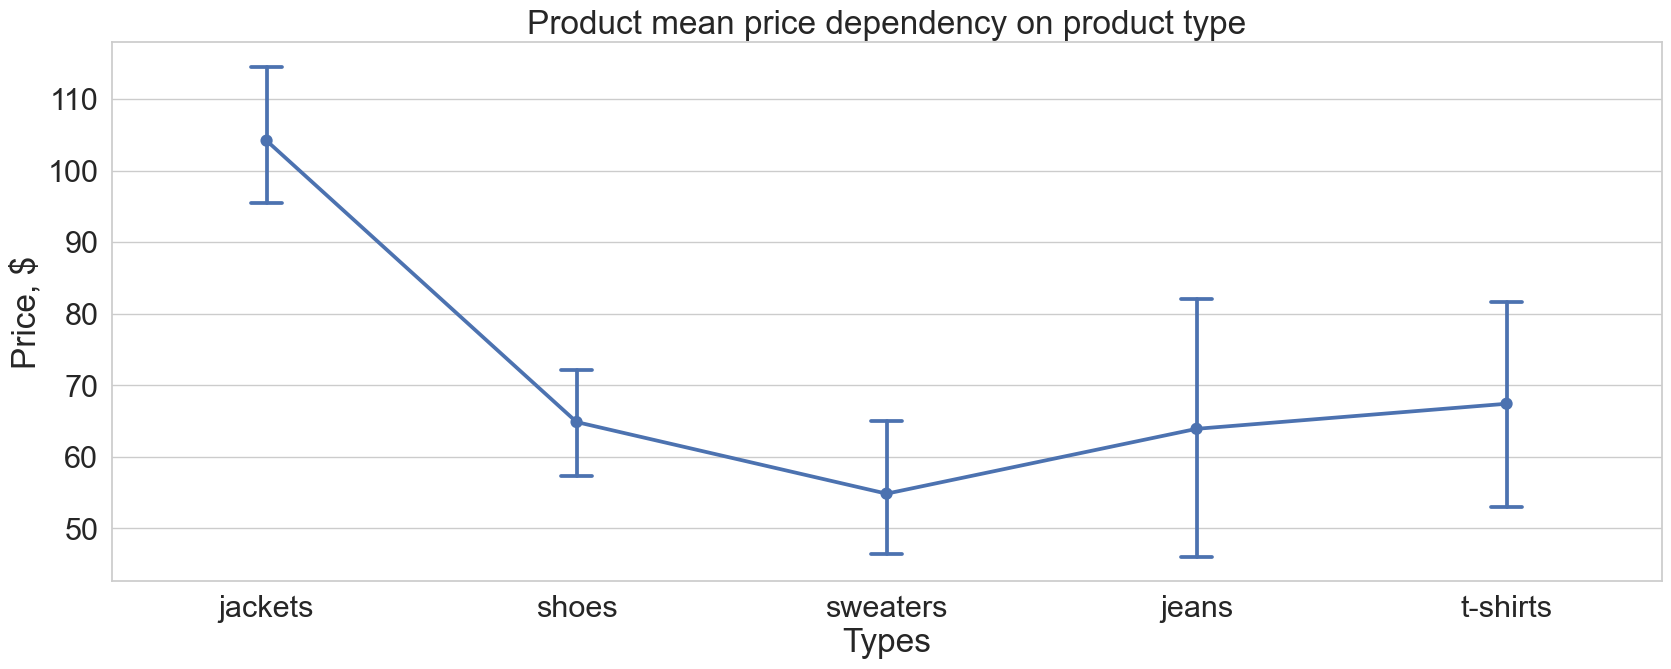

In [209]:
ax2_32 = sns.pointplot(x='terms', y='price', data=sales, capsize=0.1, errorbar='ci')
ax2_32.set(xlabel = 'Types', ylabel='Price, $', title='Product mean price dependency on product type')

# Находим средний прайс с каждого типа товара и строим 95% доверительный интервал
# Средний прайс jackets значительно выше, чем у других типов товара

Text(0.5, 1.0, "Product's prices by product's prices boxplot distribution")

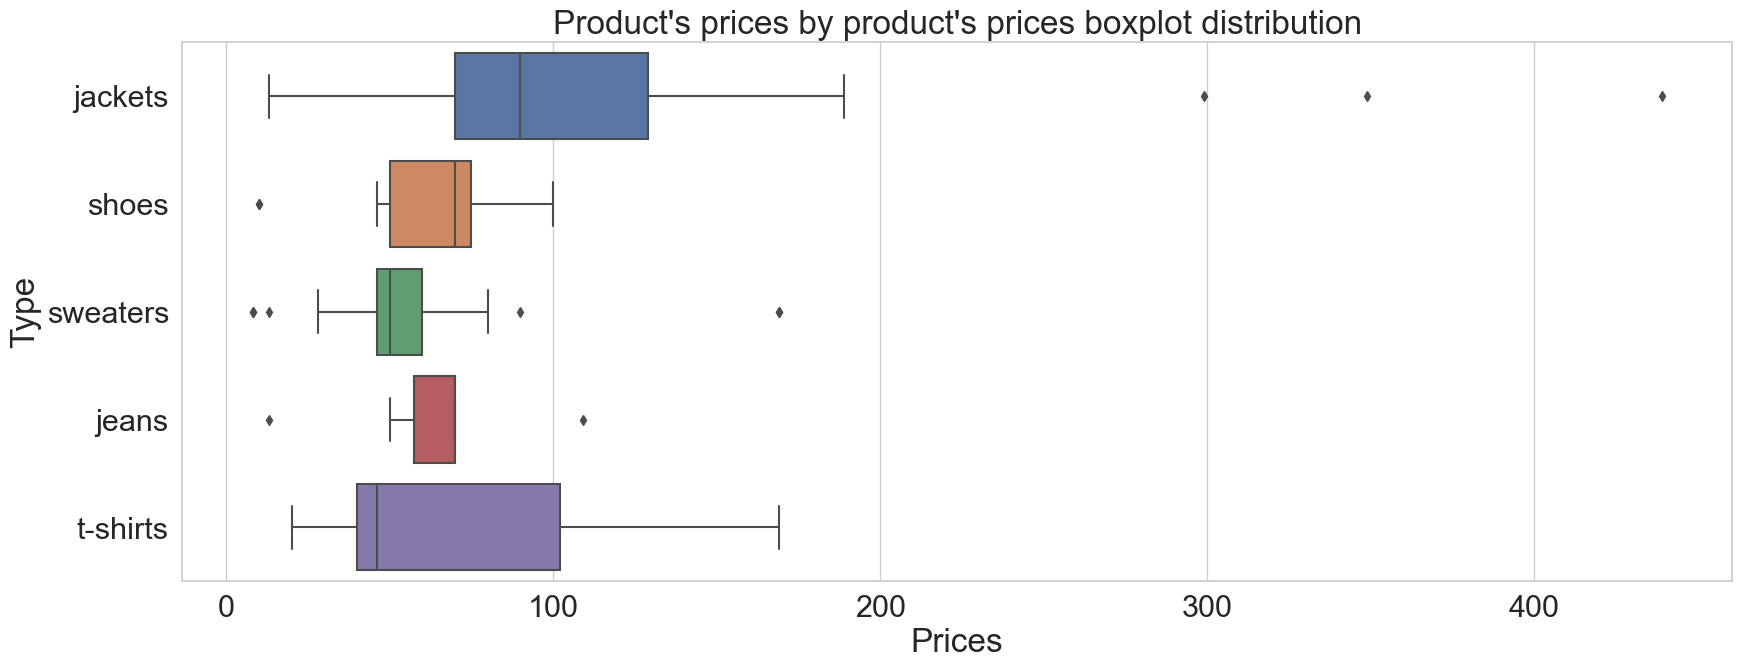

In [38]:
ax2_4 = sns.boxplot(data = sales, x = 'price', y = 'terms')

ax2_4.set(xlabel = 'Prices', ylabel = 'Type')
ax2_4.set_title('''Product's prices by product's prices boxplot distribution''')

# В среднем наибольшие цены встречаются чаще всего в категории jackets

In [ ]:
# По полученным данным получается, что выручка с jackets намного выше выручки с других типов продуктов за счет прайса,
# по которому jackets продаются - он значительно больше цен на другие типы товаров

In [39]:
# Теперь посмотрим на данные в отношении товаров, которые участвуют в промоушене (столбец promotion)

In [40]:
revenue_with_prom = sales \
    .query('promotion == "Yes"') \
    .revenue_by_item.sum() 
revenue_without_prom = sales \
    .query('promotion == "No"') \
    .revenue_by_item.sum()

np.round((revenue_with_prom - revenue_without_prom) / revenue_with_prom * 100, 2)

# Выручка с товаров, участвующих в промоушне, превышает выручку с товаров вне промоушна на 0.58%. 
# Имеет смысл сравнить полученную прибыль с этой дельты выручки с затратами на промоушн,
# чтобы определить эффективность настоящей программы промоушна
# Однако в рамках датасета, который используется в этом проекте, таких данных нет

0.58

In [41]:
# Следует также оценить вклад сезонности товаров на продажи (столбец seasonal)

In [42]:
revenue_with_season = sales.groupby('seasonal', as_index=False).revenue_by_item.sum()

rev_season_diff = np.round(revenue_with_season \
          .query('seasonal == "Yes"') \
          .revenue_by_item.sum() - revenue_with_season.query('seasonal == "No"').revenue_by_item.sum(),2)
rev_season_diff

# Выручка с сезонных товаров превышает выручку с несезонных на 261281.84

261281.84

In [43]:
np.round(rev_season_diff /  revenue_with_season \
          .query('seasonal == "Yes"') \
          .revenue_by_item.sum() * 100,2)

# Выручка с сезонных товаров превышает выручку с несезонных на 1.36%.

1.36

In [44]:
# Обратим внимание на данные по товарам относительно их местонахождения в помещении магазина (столбец product_position)
# Есть 3 варианта: Aisle (проход, коридор), end-cap (конец прохода - aisle), front of store (лицевая часть магазина)

[Text(1, 0, '15'), Text(1, 0, '12'), Text(1, 0, '11')]

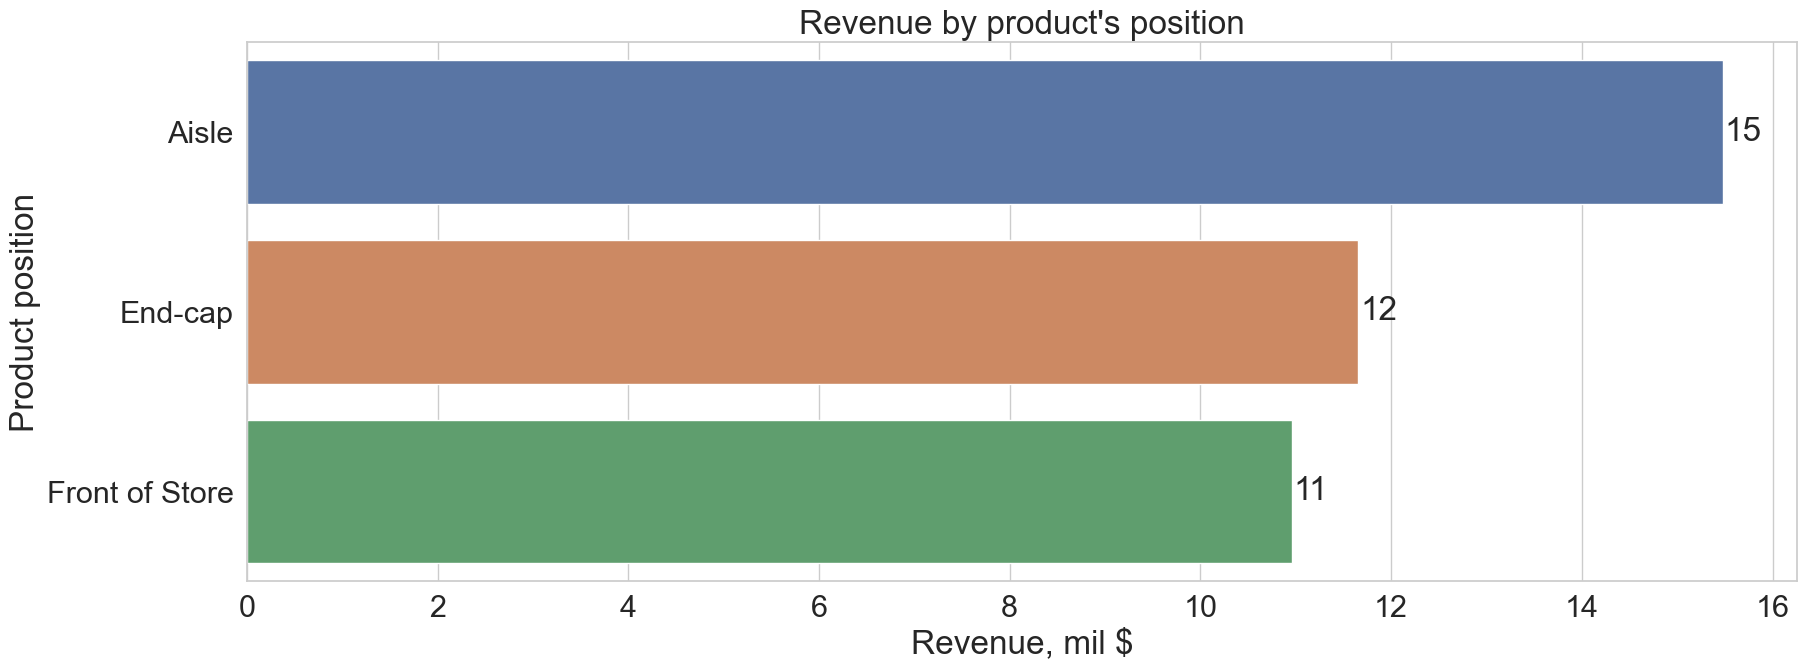

In [45]:
rev_by_prod_pos_df = sales.groupby('product_position', as_index=False).revenue_by_item.sum()

ax3_1 = sns.barplot(y = rev_by_prod_pos_df.product_position,
                    x = rev_by_prod_pos_df.revenue_by_item / 1000000)
ax3_1.set(xlabel='Revenue, mil $', ylabel='Product position')
ax3_1.set_title('''Revenue by product's position''')
ax3_1.bar_label(ax3_1.containers[0], fmt='%.0f', padding=1)

# Распределение выручки по разным сегментам магазина

Text(0.5, 1.0, "Revenue by product's position and type")

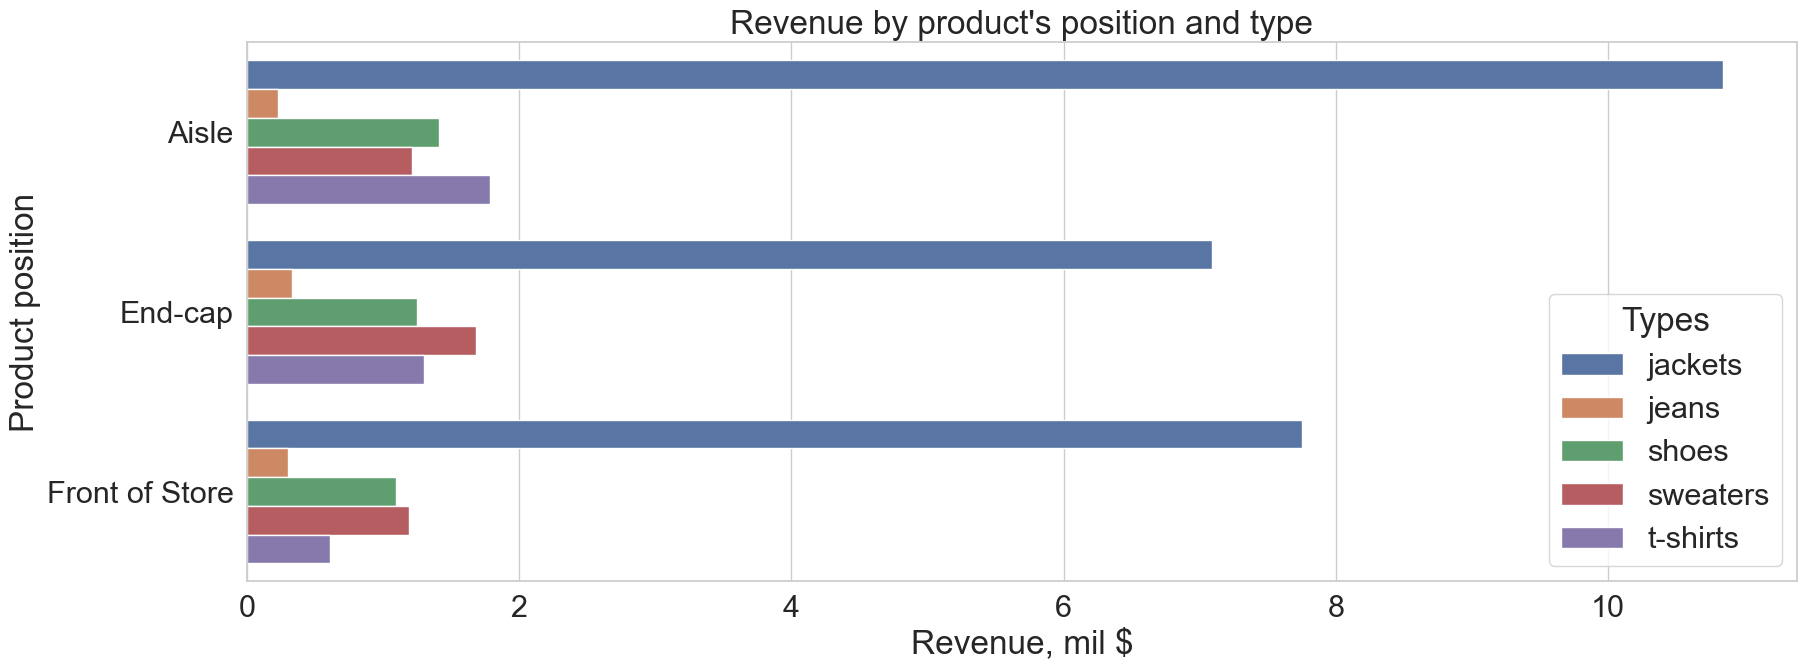

In [46]:
rev_by_prod_pos_w_terms_df =  sales.groupby(['product_position', 'terms'], as_index=False).revenue_by_item.sum()

# Строим датасет из sales с группировкой по типу товар, его местоположению в магазине и принесенной выручке

ax3_2 = sns.barplot(y   = rev_by_prod_pos_w_terms_df.product_position,
                    x   = rev_by_prod_pos_w_terms_df.revenue_by_item / 1000000,
                    hue = rev_by_prod_pos_w_terms_df.terms.rename('Types'))
ax3_2.set(xlabel='Revenue, mil $', ylabel='Product position')
ax3_2.set_title('''Revenue by product's position and type''')

# Распределение выручки по местонахождению товаров в магазине, в качестве подкатегорий использовались категории самих товаров:
# jackets, jeans, shoes, sweaters, t-shirts

# Слишком большой вклад вносит категория jackets, очевидный лидер. Представляет интерес посмотреть на отношение
# показателей остальных категорий без jackets, как позиций для диверсификации бизнеса.

Text(0.5, 1.0, "Revenue by product's position and type without jackets")

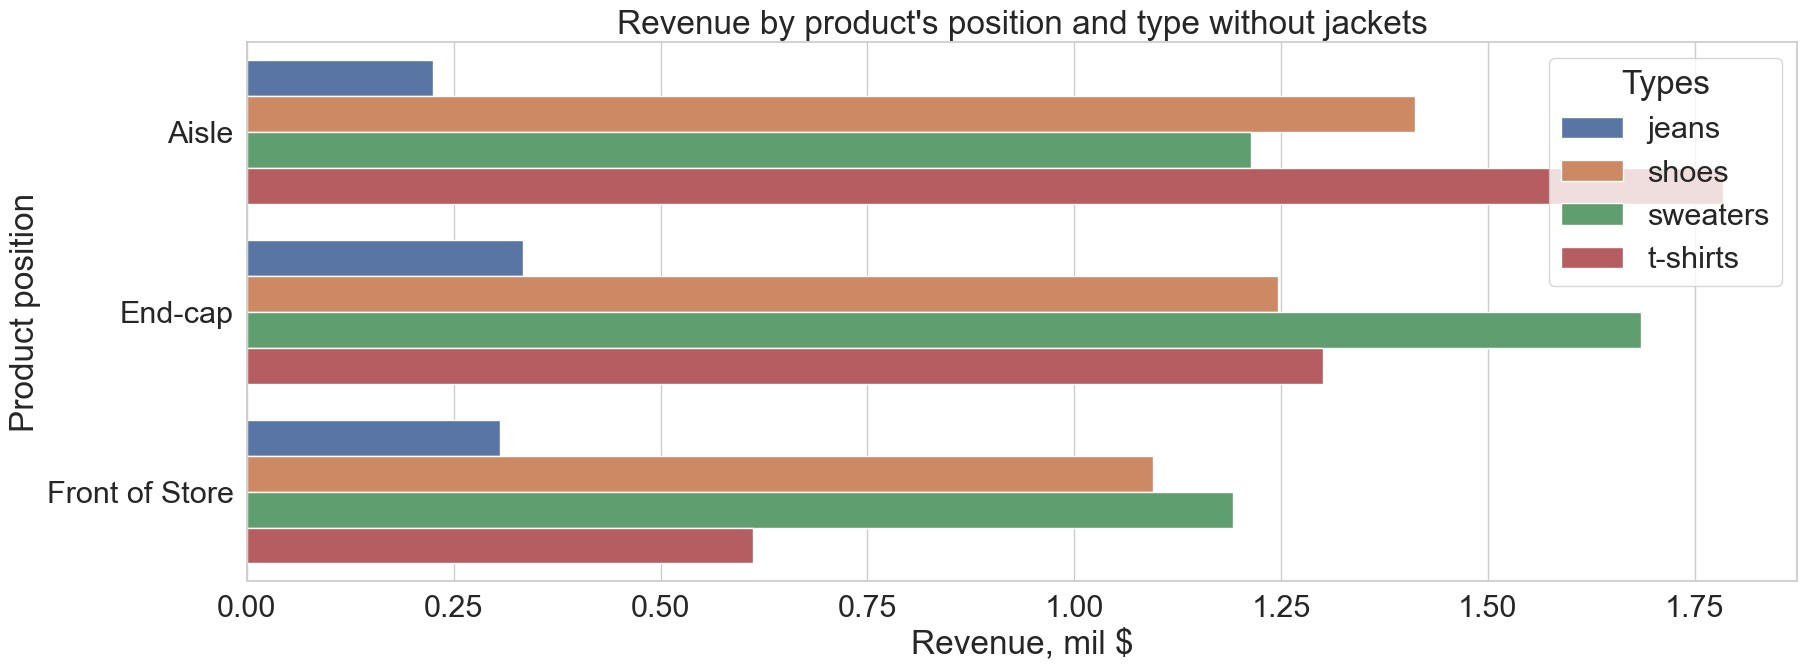

In [47]:
rev_by_prod_pos_w_terms_df_wo_jack = rev_by_prod_pos_w_terms_df \
                                    .drop(rev_by_prod_pos_w_terms_df \
                                        .loc[rev_by_prod_pos_w_terms_df.terms == 'jackets'] \
                                        .index)

ax3_3 = sns.barplot(y   = rev_by_prod_pos_w_terms_df_wo_jack.product_position,
                    x   = rev_by_prod_pos_w_terms_df_wo_jack.revenue_by_item / 1000000,
                    hue = rev_by_prod_pos_w_terms_df_wo_jack.terms.rename('Types'))
ax3_3.set(xlabel='Revenue, mil $', ylabel='Product position')
ax3_3.set_title('''Revenue by product's position and type without jackets''')

# мы знаем, что shoes, sweaters, t-shirts приносят примерно одинаковую выручку, поэтому интересно как 
# местоположение в зале магазина влияет на выручку с каждой из этих категорий.
# Судя по полученным ниже зависимостям, в Aisle выгоднее всего выставлять t-shirts, 
# в End-cap - sweaters, а Front of store почти одинаково выгоден и для shoes, и sweaters.

Text(0.5, 1.0, "Sales volume by product's position boxplot distribution")

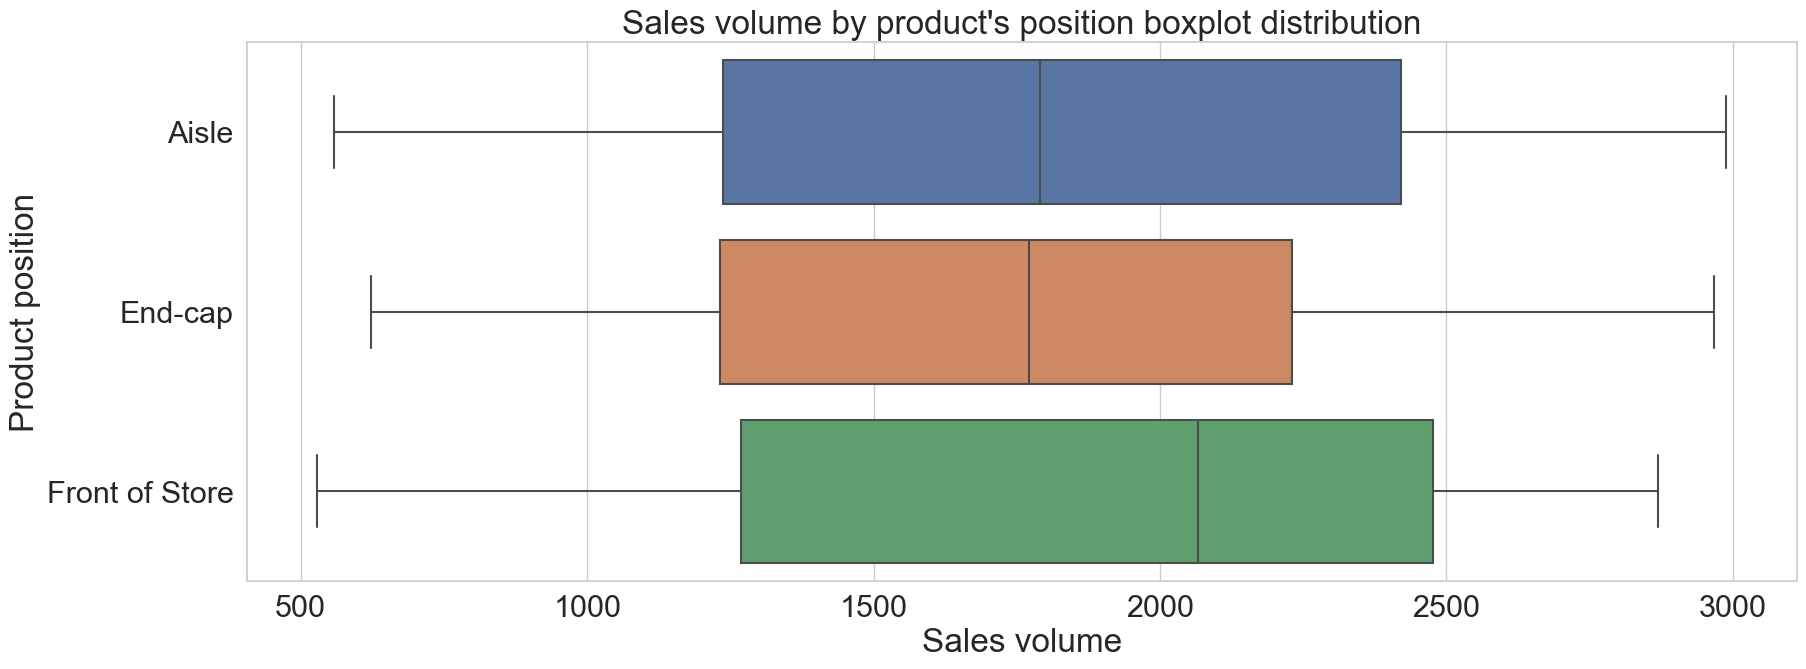

In [48]:
ax4_1 = sns.boxplot(x = sales.sales_volume, y = sales.product_position)

ax4_1.set(xlabel='Sales volume', ylabel='Product position')
ax4_1.set_title('''Sales volume by product's position boxplot distribution''')

# Оценим объемы продаж товаров в штуках в зависимости от местоположения в магазине

Text(0.5, 1.0, "Sales volume by product's position and type boxplot distribution")

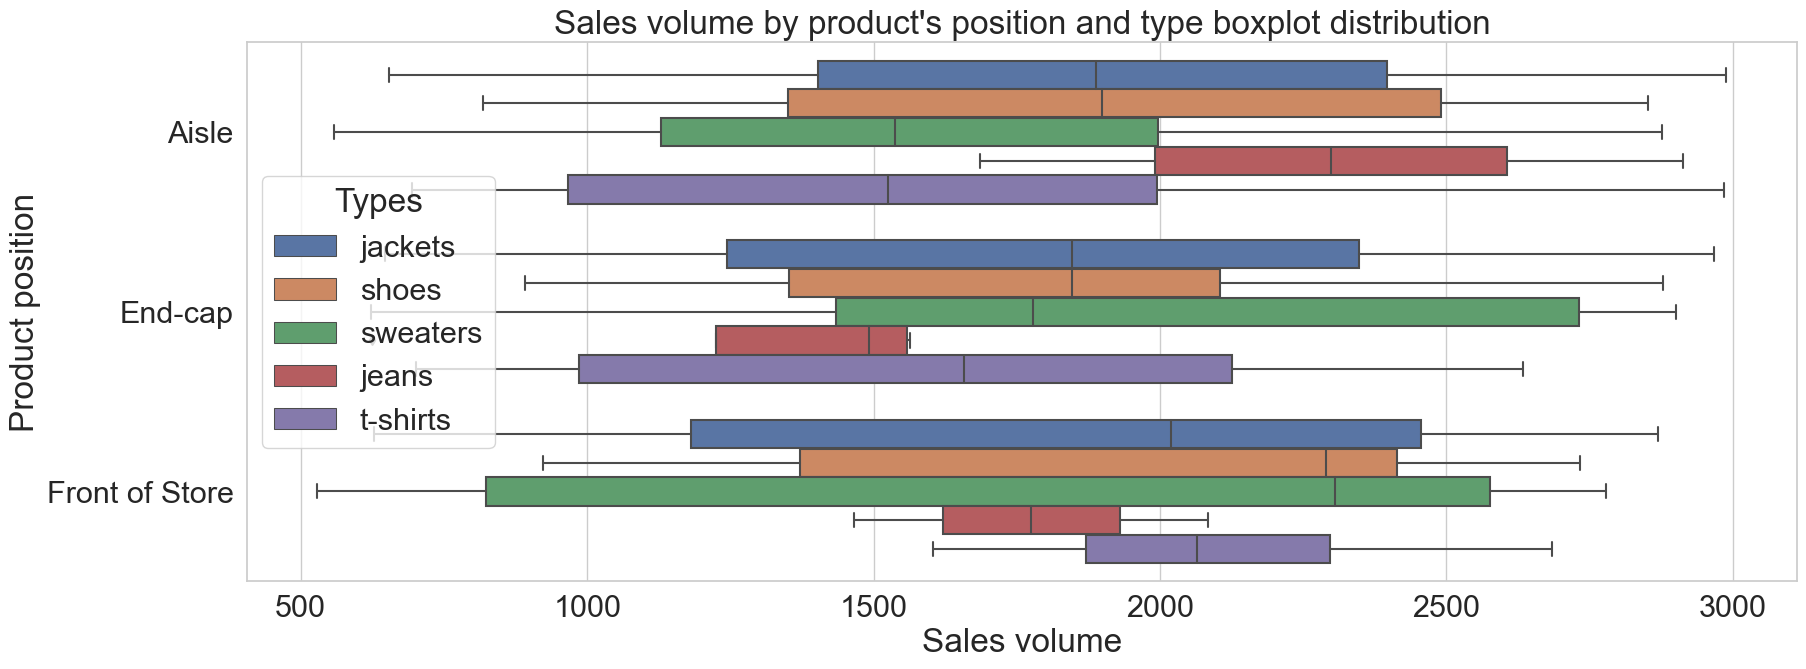

In [49]:
ax4_2=sns.boxplot(x = sales.sales_volume, 
            y = sales.product_position,
            hue = sales.terms.rename('Types'))

ax4_2.set(xlabel='Sales volume', ylabel='Product position')
ax4_2.set_title('''Sales volume by product's position and type boxplot distribution''')

# Строим боксплот по количеству проданного товара в зависимости от его типа и местонахождения в магазине

In [50]:
# Попробуем изучить распределение количества проданных товаров, sales_volume

In [51]:
sales.sales_volume.describe()

# Для sales_volume среднеквадратичное отклонение и среднее: std ~ 700, mean ~ 1822

count     250.000000
mean     1822.224000
std       700.136055
min       529.000000
25%      1239.000000
50%      1836.500000
75%      2402.250000
max      2989.000000
Name: sales_volume, dtype: float64

Text(0.5, 0.98, 'Sales volume distribution')

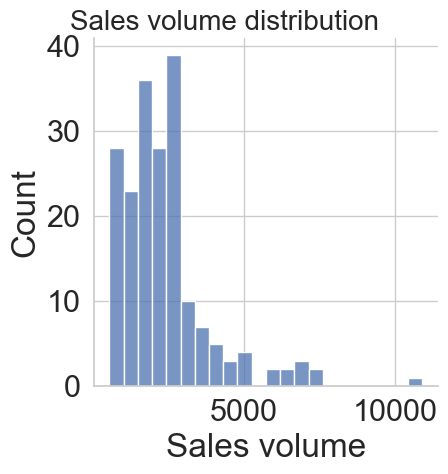

In [52]:
ax5_1 = sns.displot(sales.groupby('name', as_index=False).sales_volume.sum().sales_volume.rename('Sales volume'))
ax5_1.fig.suptitle("Sales volume distribution",
                  fontsize=20, 
                  fontdict={"weight": "bold"})

# Распределение количества проданных товаров, сгруппированных по названию

In [53]:
sales.groupby('name', as_index=False).sales_volume.sum().query('sales_volume > 10000')

# Смотрим, что за товар у нас является выбросом на графике выше

# Это абсолютный лидер по количеству продаж, он также входит в топ-10 товаров по принесенной выручке

,name,sales_volume
118,PLAID OVERSHIRT,10910


Text(0.5, 0.98, "Log'ed sales volume distribution")

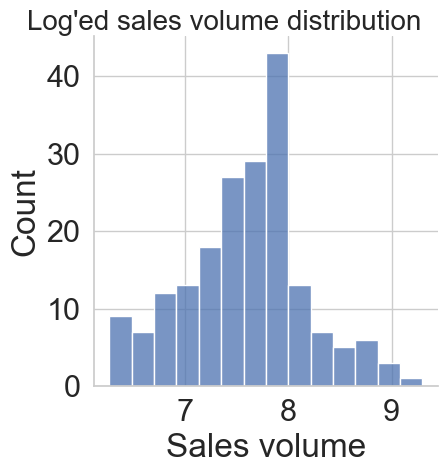

In [54]:
ax5_2 = sns.displot(np.log(sales.groupby('name', as_index=False).sales_volume.sum().sales_volume.rename('Sales volume')))
ax5_2.fig.suptitle("Log'ed sales volume distribution",
                  fontsize=20, 
                  fontdict={"weight": "bold"})

# Логарифмируем количество проданных товаров,
# чтобы преобразовать скошенное распределение на графике сверху в похожее на нормальное

In [55]:
stats.shapiro(np.log(sales.groupby('name', as_index=False).sales_volume.sum().sales_volume))

# Тест Шапиро-Уилка на нормальность распределения. Полученное значение p-value говорит о том, что стоит отклонить 
# гипотезу о нормальности распределения.

ShapiroResult(statistic=0.9854638513849274, pvalue=0.043943617505595944)

In [56]:
pg.normality(np.log(sales.groupby('name', as_index=False).sales_volume.sum().sales_volume))

# Еще один тест на нормальность по Шапиро, реализованный в другом стат пакете, дал такой же результат, что и выше

,W,pval,normal
sales_volume,0.985464,0.043944,False


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

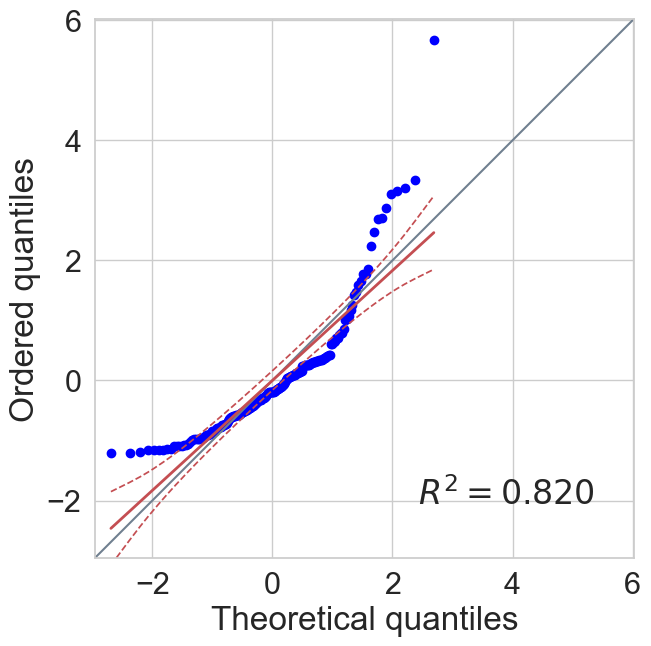

In [57]:
pg.qqplot((sales.groupby('name', as_index=False).sales_volume.sum().sales_volume))

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

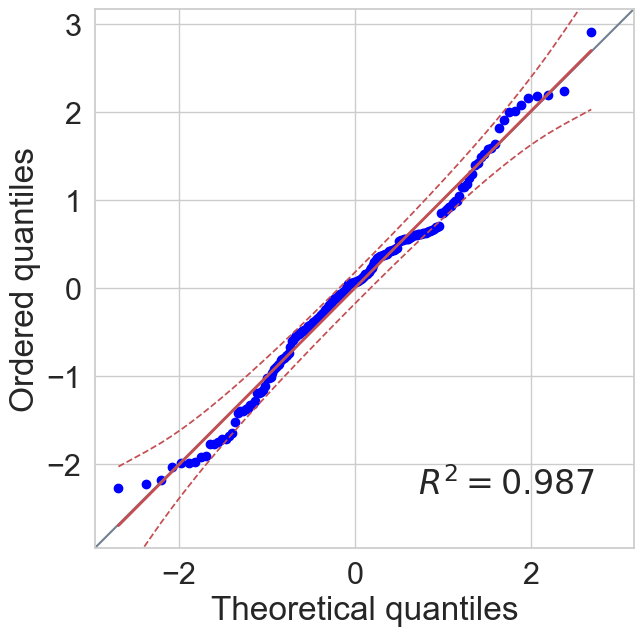

In [58]:
# Попробуем построить qqplot

pg.qqplot(np.log(sales.groupby('name', as_index=False).sales_volume.sum().sales_volume))

In [59]:
# Можно сказать, что распределение стремится к нормальному

In [60]:
# В настоящих условиях возможно применить t-тест к распределению логарифма количества проданных товаров

In [61]:
sales_vol_jackets = np.log(sales[sales.terms == "jackets"].sales_volume)
sales_vol_jeans = np.log(sales[sales.terms == "jeans"].sales_volume)
sales_vol_sweaters = np.log(sales[sales.terms == "sweaters"].sales_volume)
sales_vol_shoes = np.log(sales[sales.terms == "shoes"].sales_volume)
sales_vol_t_shirts = np.log(sales[sales.terms == "t-shirts"].sales_volume)

# Создаем переменные по типам товаров с логарифмированными столбцами количества проданных штук (sales_volume)

In [62]:
# ПРОВЕРЬ КОЛИЧЕСТВО НАБЛЮДЕНИЙ В КАЖДОЙ ИЗ ВЫБОРОК ВЫШЕ (ЕСТЬ ЛИ МЕНЬШЕ 30)
# ПРОВЕРЬ МОЖЕТ ЛИ РАБОТАТЬ ANOVA(F_ONEWAY ??) С >3 ВЫБОРОК

In [63]:
sales_vol_types_list = [sales_vol_jackets, sales_vol_jeans, sales_vol_sweaters, sales_vol_shoes, sales_vol_t_shirts]

for prod_type in sales_vol_types_list:
    print(prod_type.shape[0])

# В выборке джинс (jeans) наблюдений всего 8, поэтому с ними будет тяжело
# В остальных выборках наблюдений >30, что является хорошими вводными для использования t-теста

138
8
41
31
32


In [64]:
stats.ttest_ind(sales_vol_jackets, sales_vol_shoes)

# Проверяем гипотезу о том, что логарифмированные средние значения проданных jackets и shoes статистически отличаются
# Т-тест показывает, что мы не можем отвергнуть эту гипотезу

TtestResult(statistic=-0.3220215177138153, pvalue=0.7478391345494901, df=167.0)

In [65]:
stats.mannwhitneyu(sales_vol_jackets, sales_vol_shoes)

# Снова проверяем гипотезу,  что логарифмированные средние значения проданных jackets и shoes статистически отличаются,
# но теперь с помощью теста Манна-Уитни, чтобы не обращать внимание на результат тестов Шапиро
# Тест Манна-Уитни показывает, 
# что мы не можем отвергнуть гипотезу о равенстве логарифмированных средних ГС для jackets и shoes

MannwhitneyuResult(statistic=2123.5, pvalue=0.951414092157202)

In [152]:
pg.homoscedasticity(data=sales, dv='sales_volume', group='terms', center='median')

# Проверка на гомоскедатичность или же на примерное равенство дисперсий количества продаж по типам товаров
# Тест показал, что с дисперсией все в порядке

,W,pval,equal_var
levene,1.379705,0.241514,True


In [66]:
stats.f_oneway(sales_vol_jackets, sales_vol_jeans, sales_vol_sweaters, sales_vol_shoes, sales_vol_t_shirts)

# Применим дисперсионный однофакторный анализ для логарифмированного количества проданных товаров по их типу,
# результат которого не позволяет нам # отменить нулевую гипотезу о том,
# что средние количества проданных товаров по типу товара не отличаются

F_onewayResult(statistic=0.5701638899079164, pvalue=0.6845319952512904)

In [67]:
pg.anova(data=sales, dv='sales_volume', between='terms')

# Снова применили дисперсионный однофакторный анализ, но уже для количества проданных товаров по их типу без логарифма, 
# с другой библиотекой. Результат похож

,Source,ddof1,ddof2,F,p-unc,np2
0,terms,4,245,0.540243,0.706312,0.008743


[Text(0.5, 0, 'Types'),
 Text(0, 0.5, 'Sales volume'),
 Text(0.5, 1.0, 'Sales volume means dependency on type of product')]

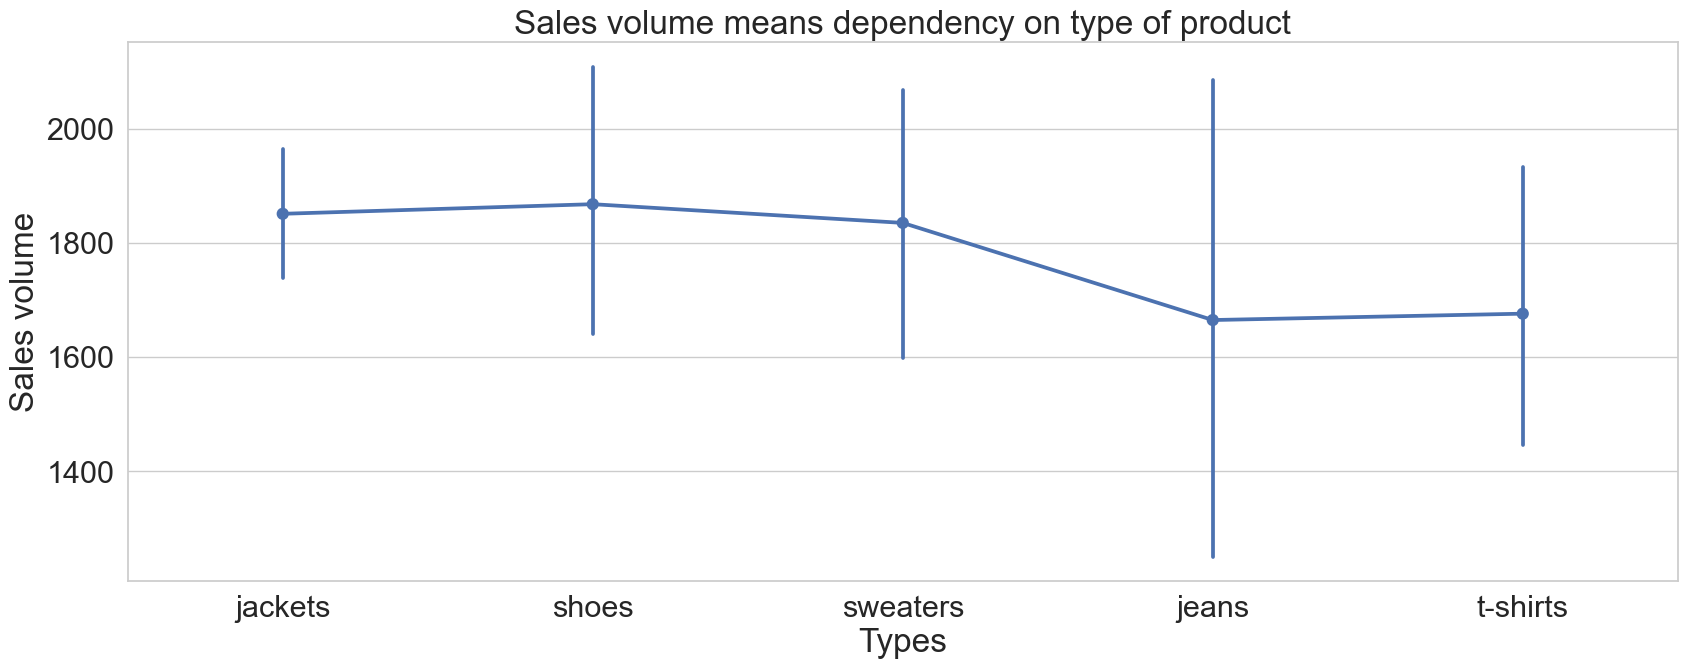

In [153]:
ax6 = sns.pointplot(x='terms', y='sales_volume', data=sales, errorbar = 'ci')
ax6.set(xlabel = 'Types',
        ylabel = 'Sales volume',
        title = 'Sales volume means dependency on type of product')

# Строим график среднего количества продаж по типу товара с 95% доверительными интервалами
# По нему действительно можно сказать, что количество продаж по типу товара не сильно отличается

In [77]:
pg.anova(data=sales, dv='sales_volume', between=['terms', 'product_position'])

# Проведем многофакторный дисперсионный анализ количества проданного товара, 
# где в качестве факторов укажем тип продукта (terms) и позицию продукта в магазина (product_position)

# По его результатам, в частности, по показателю np2, можно сказать, что большая часть дисперсии покрывается
# эффектом взаимосвязи между типом продукта и его позицией в магазине. 
# При этом p-value не позволяет отклонить нулевую гипотезу о равенстве средних для каждого из факторов
# Таким образом, нет смысла проводить множественные сравнения ни для одного из факторов

# Получается, люди одинаково покупают все типы продуктов

,Source,SS,DF,MS,F,p-unc,np2
0,terms,9.514279e+05,4.0,237856.987418,0.474029,0.754784,0.008004
1,product_position,2.728043e+05,2.0,136402.172952,0.271838,0.762217,0.002308
2,terms * product_position,2.799779e+06,8.0,349972.331154,0.697465,0.693658,0.023193
3,Residual,1.179177e+08,235.0,501777.364574,NaN,NaN,NaN


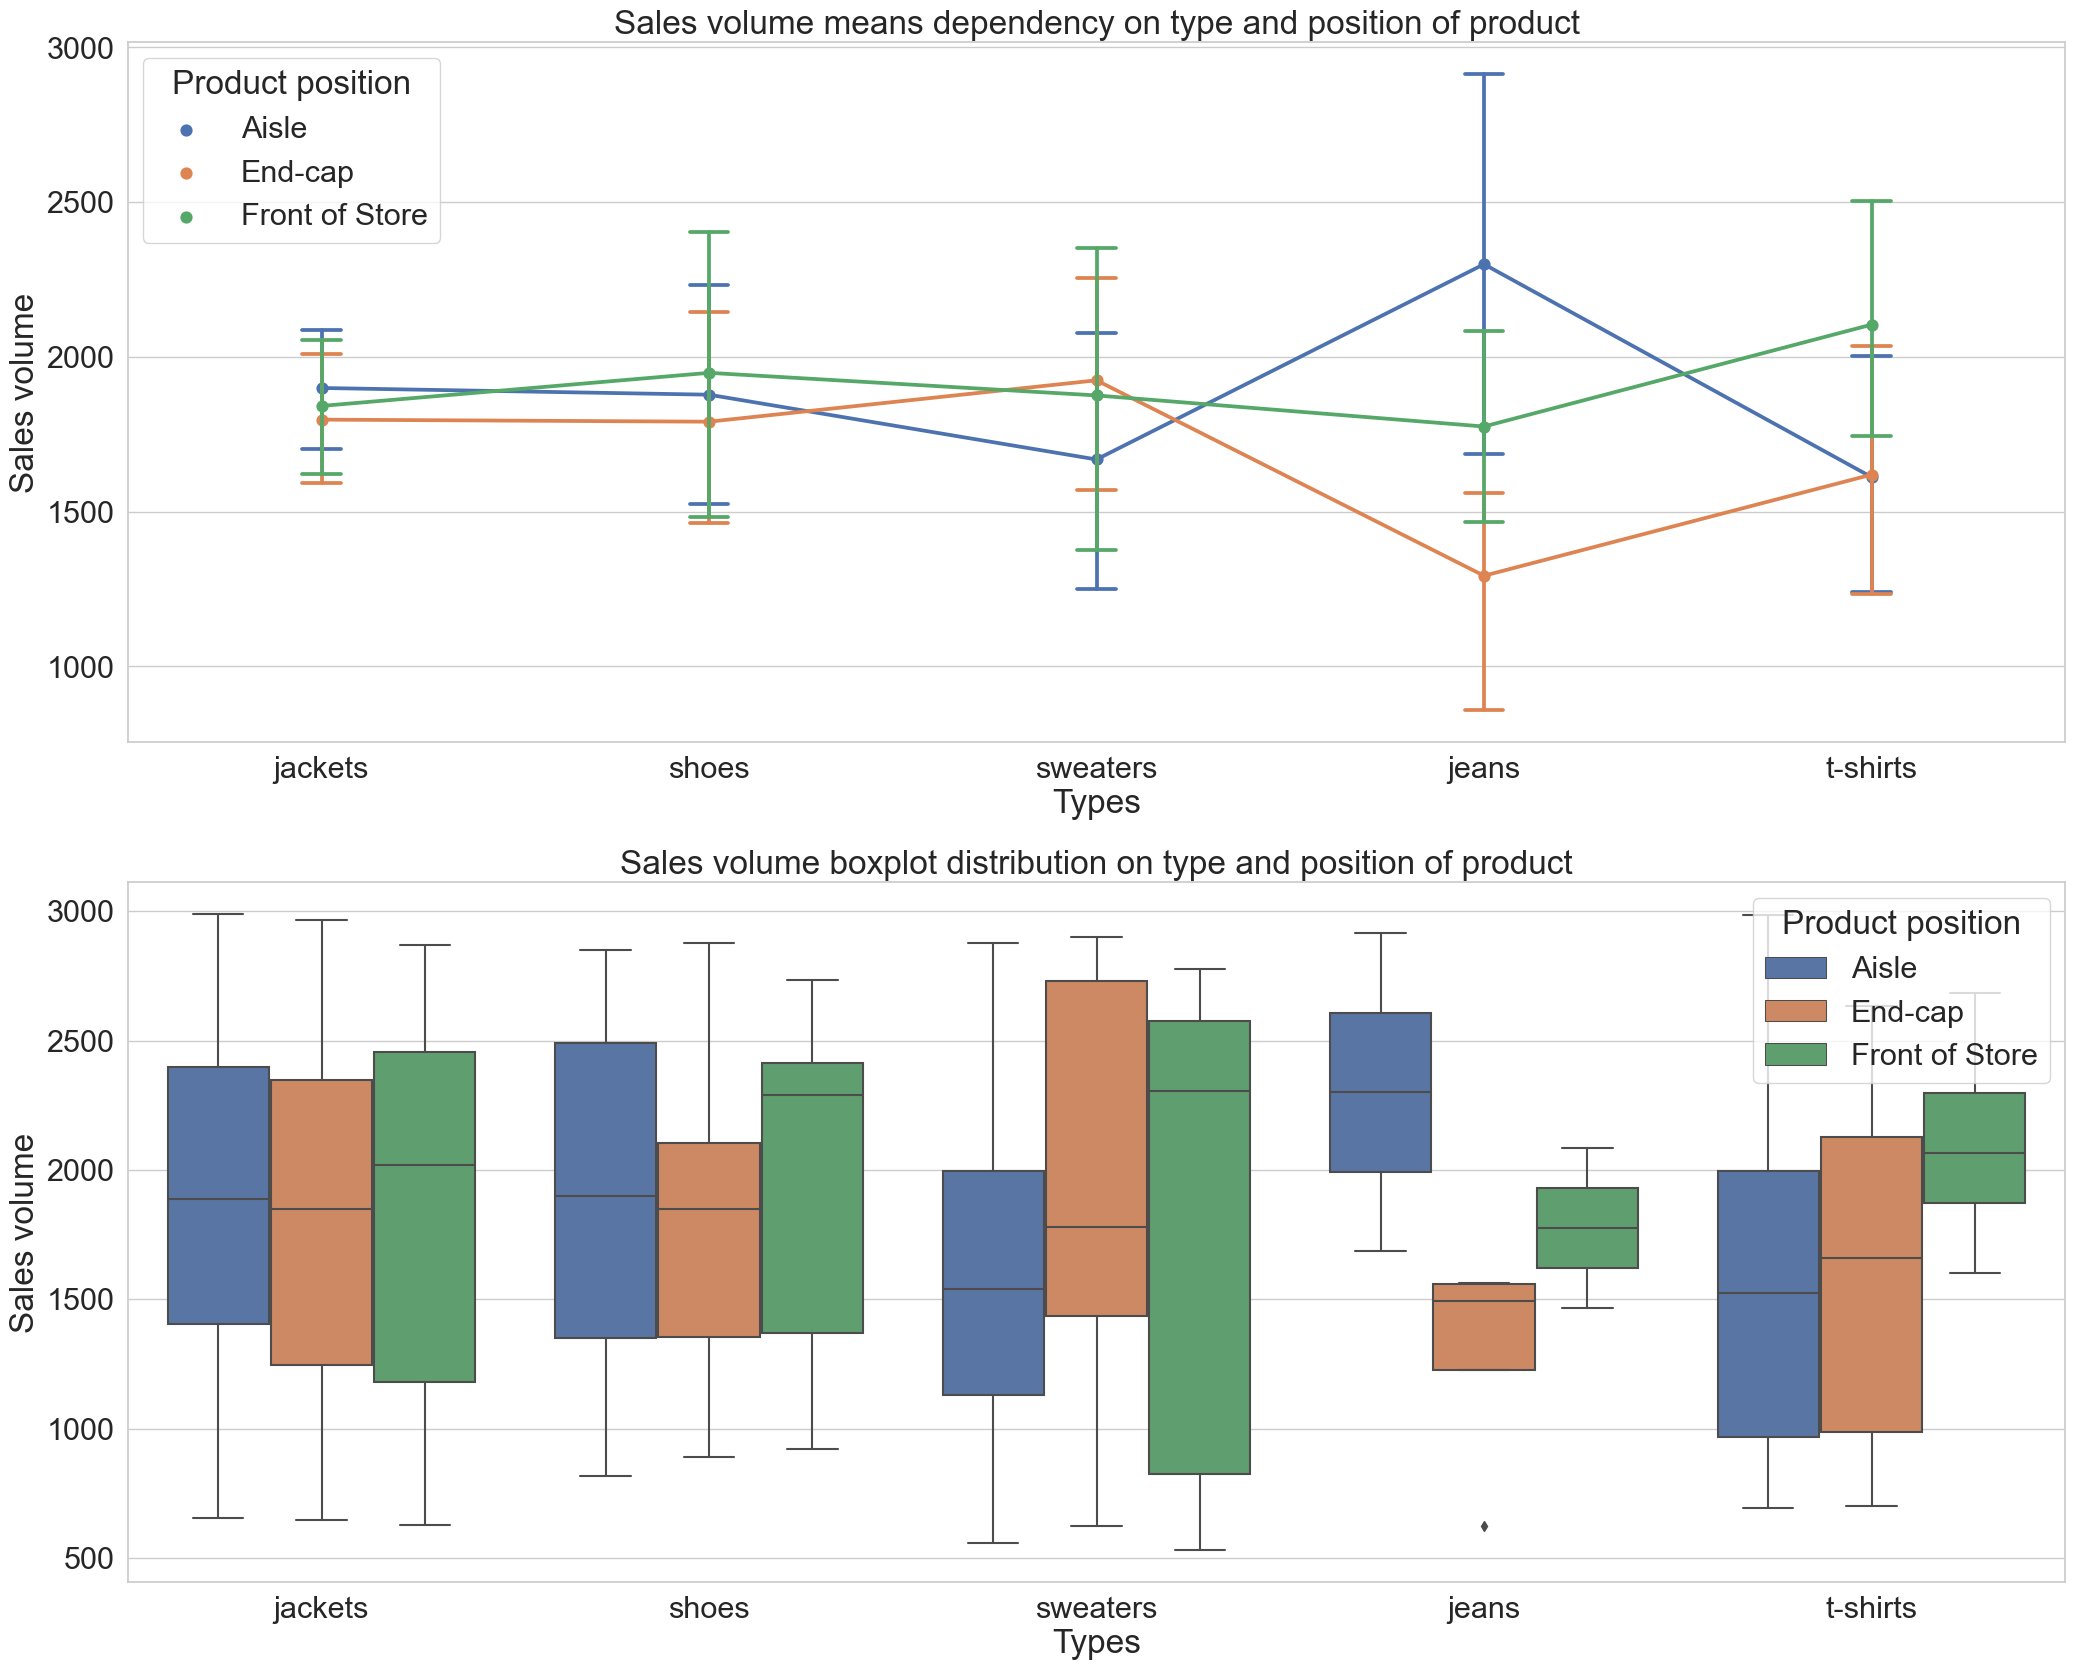

In [147]:
fig, axes = plt.pyplot.subplots(nrows=2,ncols=1, figsize=(25,20))

sns.pointplot(x='terms', y='sales_volume', hue='product_position', data=sales, capsize=0.1, ax = axes[0])
axes[0].set(xlabel = 'Types',
        ylabel = 'Sales volume',
        title = 'Sales volume means dependency on type and position of product')
axes[0].legend(title='Product position')

sns.boxplot(x='terms', y='sales_volume', hue='product_position', data=sales, ax = axes[1])
axes[1].set(xlabel = 'Types',
        ylabel = 'Sales volume',
        title = 'Sales volume boxplot distribution on type and position of product')
axes[1].legend(title='Product position')

# Построили график зависимости средних количества продаж в зависимости от типа товара и его позиции в магазине,
# а также боксплот распределение этой величины, т.к. первый график оказался не очень удобным для анализа

# Из боксплота видно, что только категория джинс в зависимости от позиции магазина может иметь разные средние количества продаж
# для каждой позиции в магазине. Проверим так ли это в следующем блоке

In [149]:
pg.pairwise_tukey(data=sales.query('terms == "jeans"'), dv="sales_volume", between="product_position")

# По критерию Тьюки мы не можем отвергнуть гипотезу о том, что средние количества продаж джинс 
# с разных позиций в магазине статистически не различаются

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Aisle,End-cap,2299.50,1292.75,1006.75,482.890865,2.084840,0.187713,1.379428
1,Aisle,Front of Store,2299.50,1775.00,524.50,557.594342,0.940648,0.640979,0.435748
2,End-cap,Front of Store,1292.75,1775.00,-482.25,482.890865,-0.998673,0.608994,-0.863033
